In [1]:

import pandas as pd
import wandb
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
api = wandb.Api()

In [3]:
def get_data(link):
    file_name = link.split("/")[-1]
    if os.path.exists("./csv/" + file_name + ".csv"):
        return pd.read_csv("./csv/" + file_name + ".csv")
    else:
        df = pd.DataFrame(api.run(link).scan_history())
        df.to_csv("./csv/" + file_name + ".csv", index=False)
        return df


def remove_nan(df, column_name):
    return list(df[column_name].dropna())


def compute_difference(dictionary, experiment_1, experiment_2):
    return {
        key: list(
            np.array(dictionary[experiment_1][key])
            - np.array(dictionary[experiment_2][key])
        )
        for key in dictionary[experiment_1]
    }

In [4]:
def plot_accuracy(data, baselines, size, dataset_name):
    epsilon_list = list(data[list(data.keys())[0]].keys())
    for epsilon in epsilon_list:
        plt.figure(figsize=(15, 10))
        plt.plot(
            baselines[size],
            label=f"Baseline",
            linewidth=3,
        )
        for experiment_type, _ in data.items():
            plt.plot(
                data[experiment_type][epsilon],
                label=f"{experiment_type} - {epsilon}",
                linewidth=3,
            )
        plt.rcParams.update({"font.size": 30})

        plt.xlabel("FL Rounds", fontsize=30)
        plt.ylabel("Accuracy", fontsize=30)
        plt.legend()
        plt.grid(True)

        plt.title(
            f"Accuracy - " + r"$\mathrm{\varepsilon}= $" + f"{epsilon}", fontsize=30
        )
        plt.tight_layout()
        plt.savefig(f"./plots/accuracy/{dataset_name}/accuracy_{size}_{epsilon}.png")

        plt.show()

In [5]:
def plot_differences(differences, dataset_name, size):
    plt.figure(figsize=(15, 10))

    for key in differences:
        plt.plot(
            differences[key], linewidth=3, label=r"($\mathrm{\varepsilon}=$" + key + ")"
        )  # + r', $\mathrm{\delta}=$')

    plt.title("Difference in Accuracy between FL and FL with Pre-Training", fontsize=30)
    plt.xlabel("FL Round", fontsize=30)
    plt.ylabel(r"$\mathrm{\Delta}$", fontsize=30)
    plt.rcParams.update({"font.size": 30})
    plt.grid(True)

    plt.legend()
    plt.tight_layout()

    plt.savefig(f"./plots/differences/{dataset_name}/{size}.png")

    plt.show()

# Mnist

In [6]:
baselines = {
    "0.2": get_data("/lucacorbucci/mnist_Sweeps/runs/5ahs1fln"),
    "0.3": get_data("/lucacorbucci/mnist_Sweeps/runs/u8cuf3pi"),
    "0.4": get_data("/lucacorbucci/mnist_Sweeps/runs/ffjium42"),
}
baselines_accuracy = {
    experiment_name: remove_nan(value, "Test Accuracy on the server")
    for experiment_name, value in baselines.items()
}

# 20% Public

In [7]:
wandb_data = {
    "p2p_server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ss3yjmv9"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ytiit6h6"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/tci785e9"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/5sdmpqtf"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/37mdp38w"),
    },
    "server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/wsnn1bl3"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/knnsfhcb"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/90wj101q"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/l29t02bz"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/gztsjo8g"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

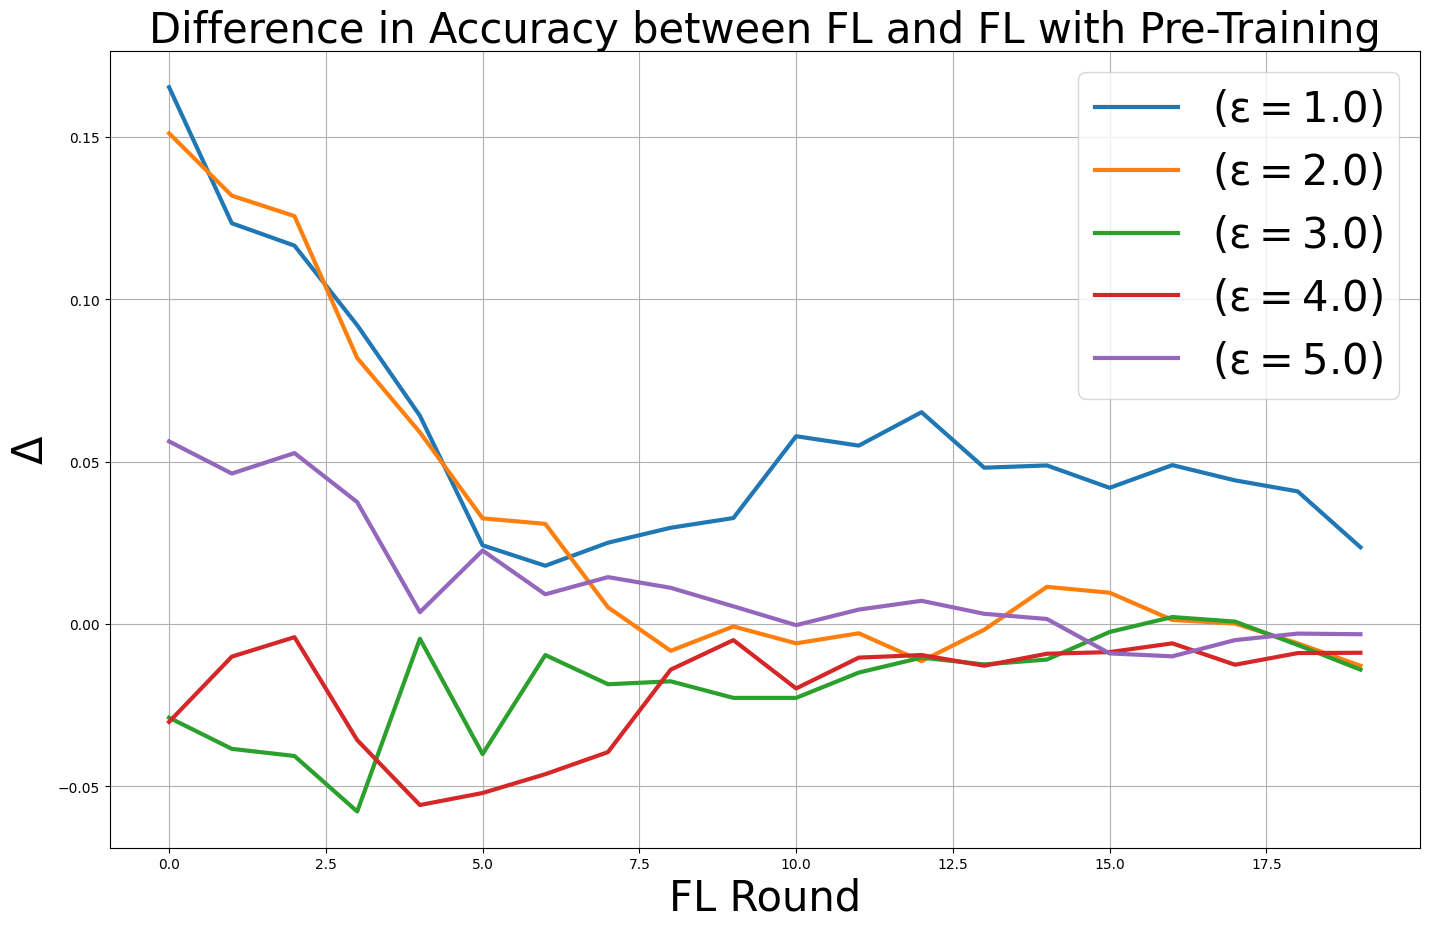

In [8]:
plot_differences(differences, dataset_name="mnist", size=0.2)

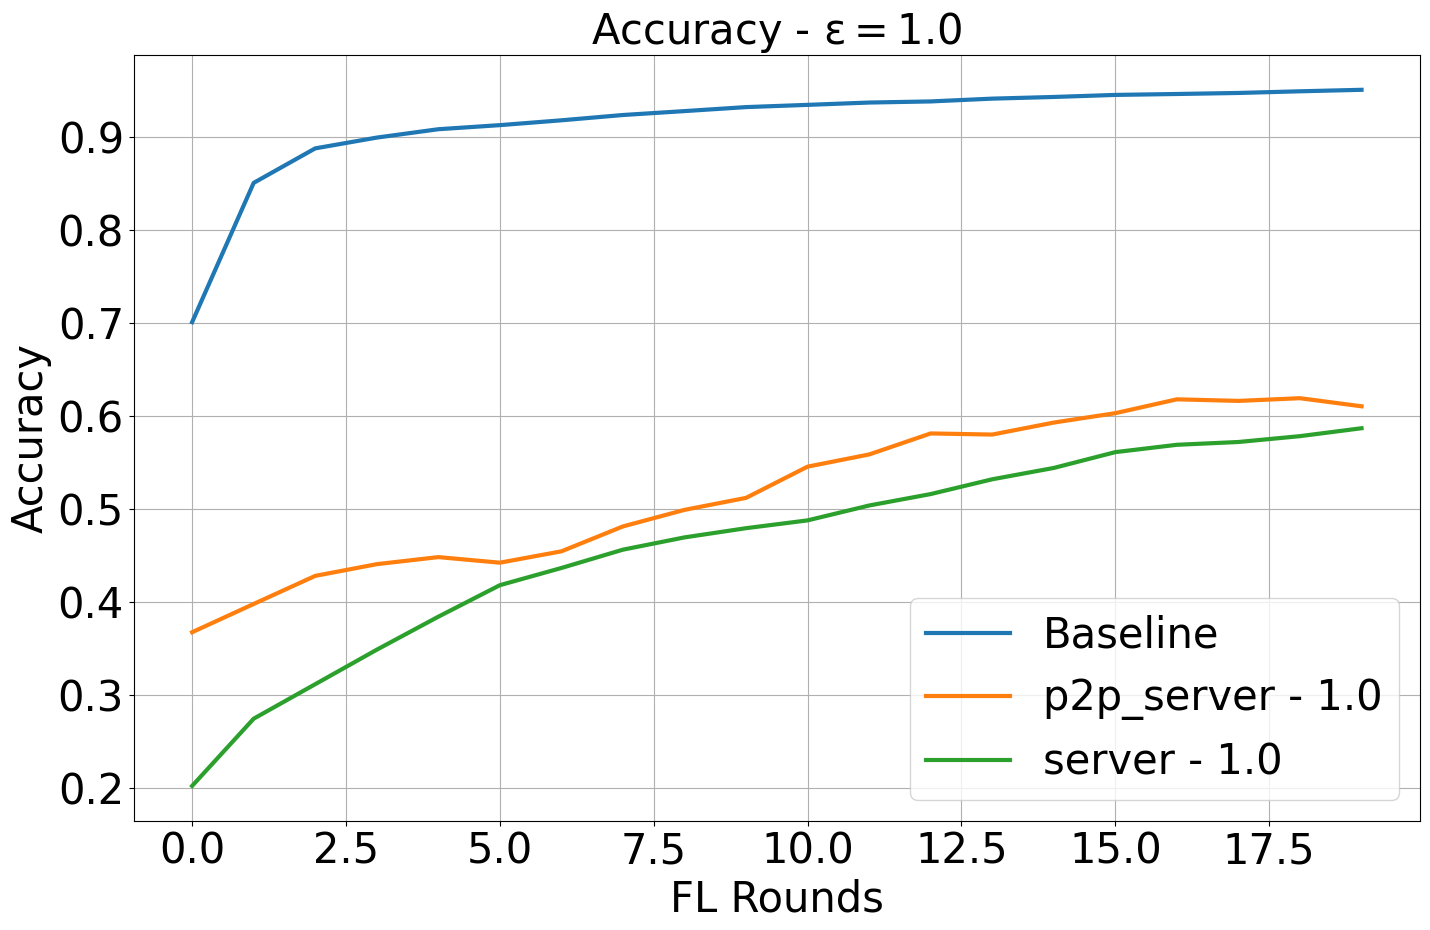

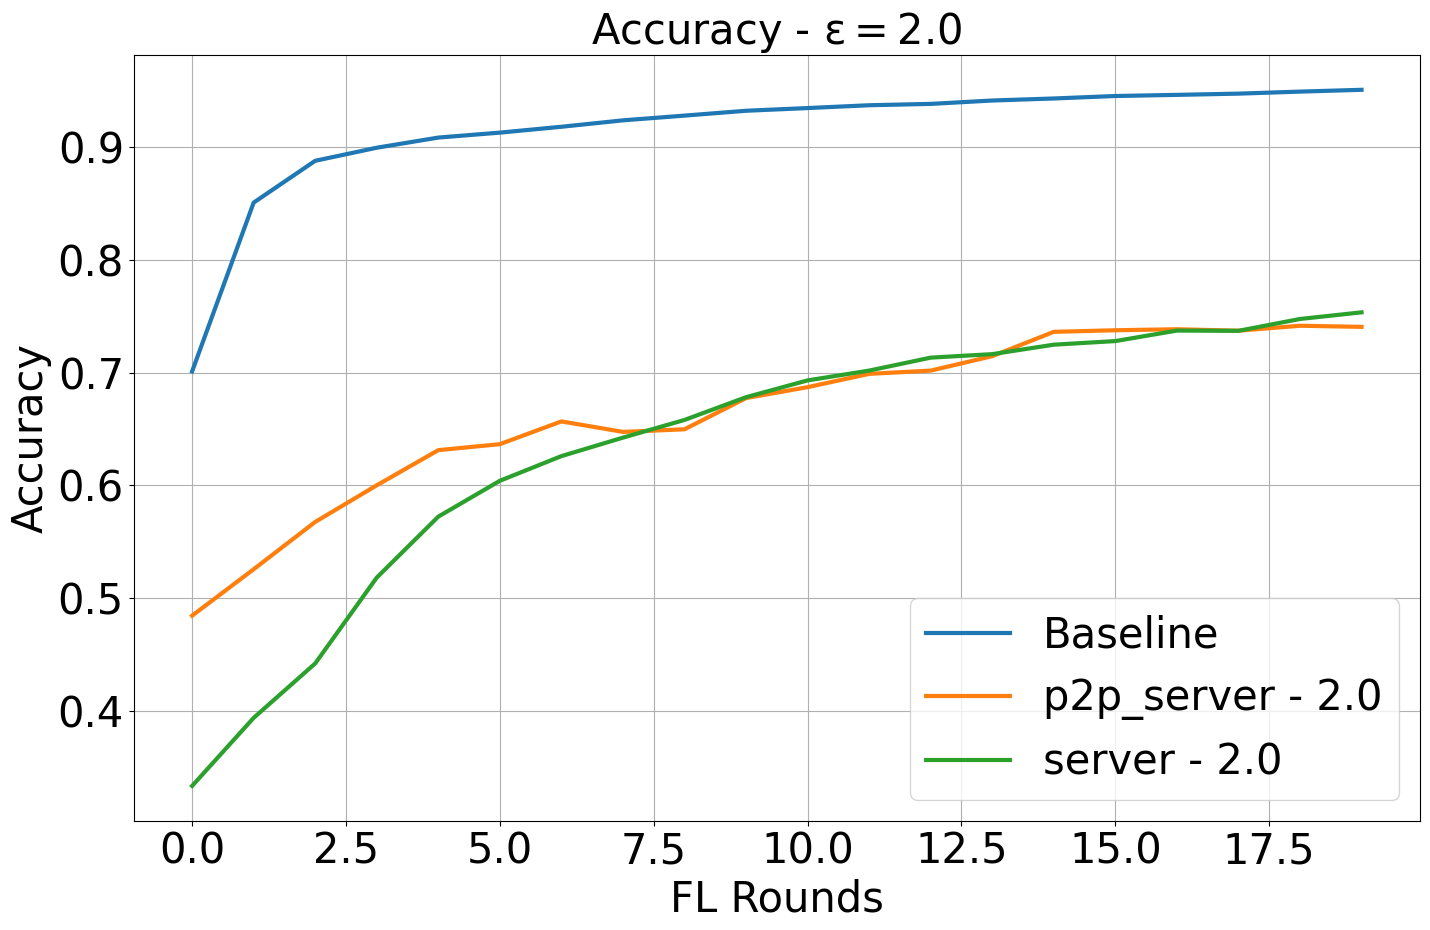

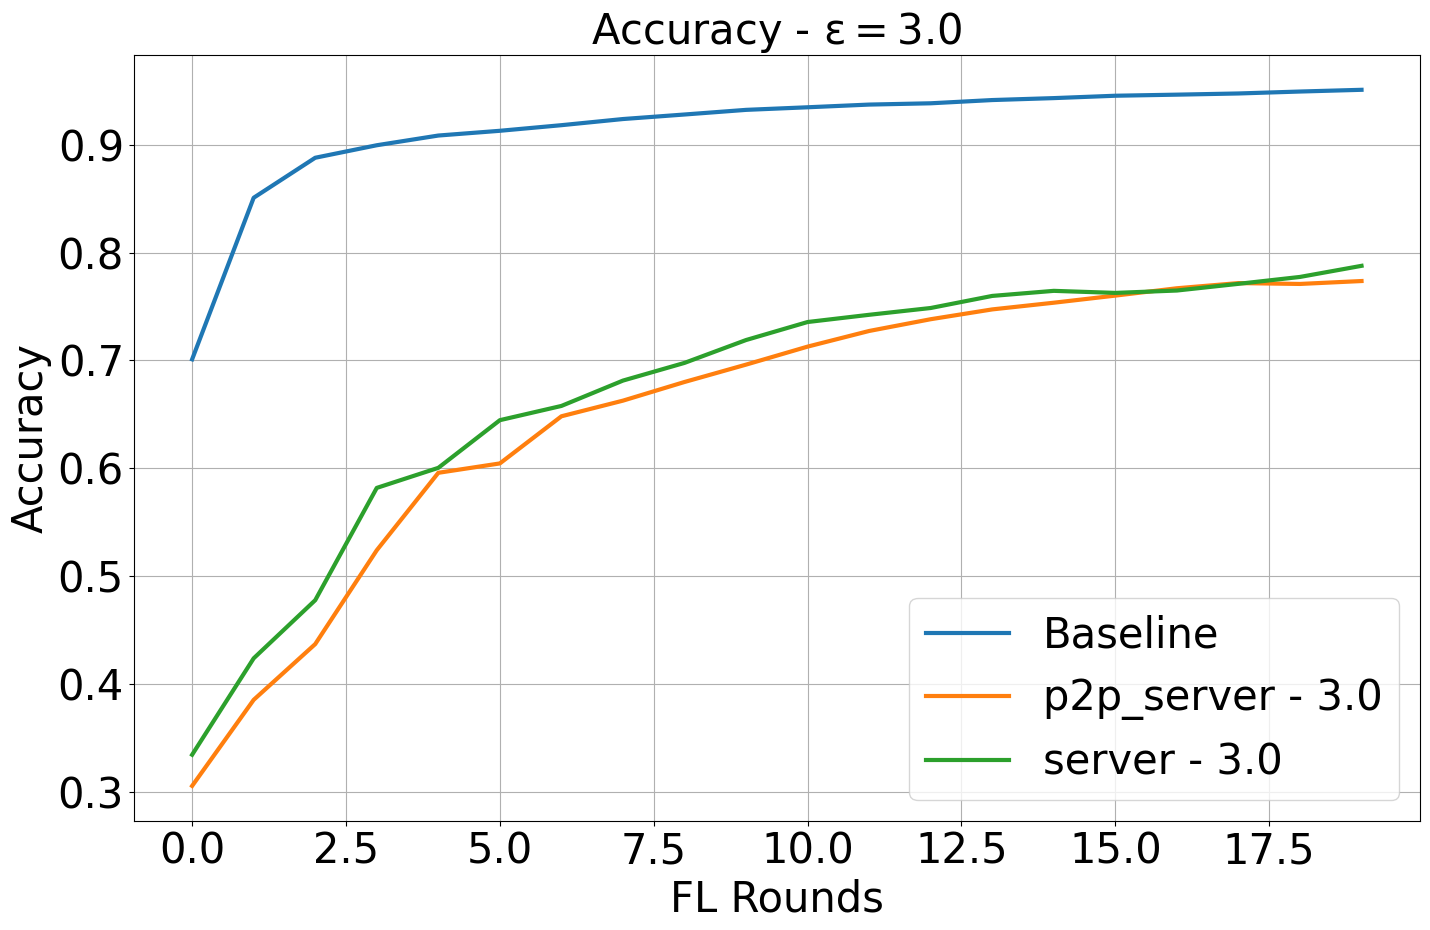

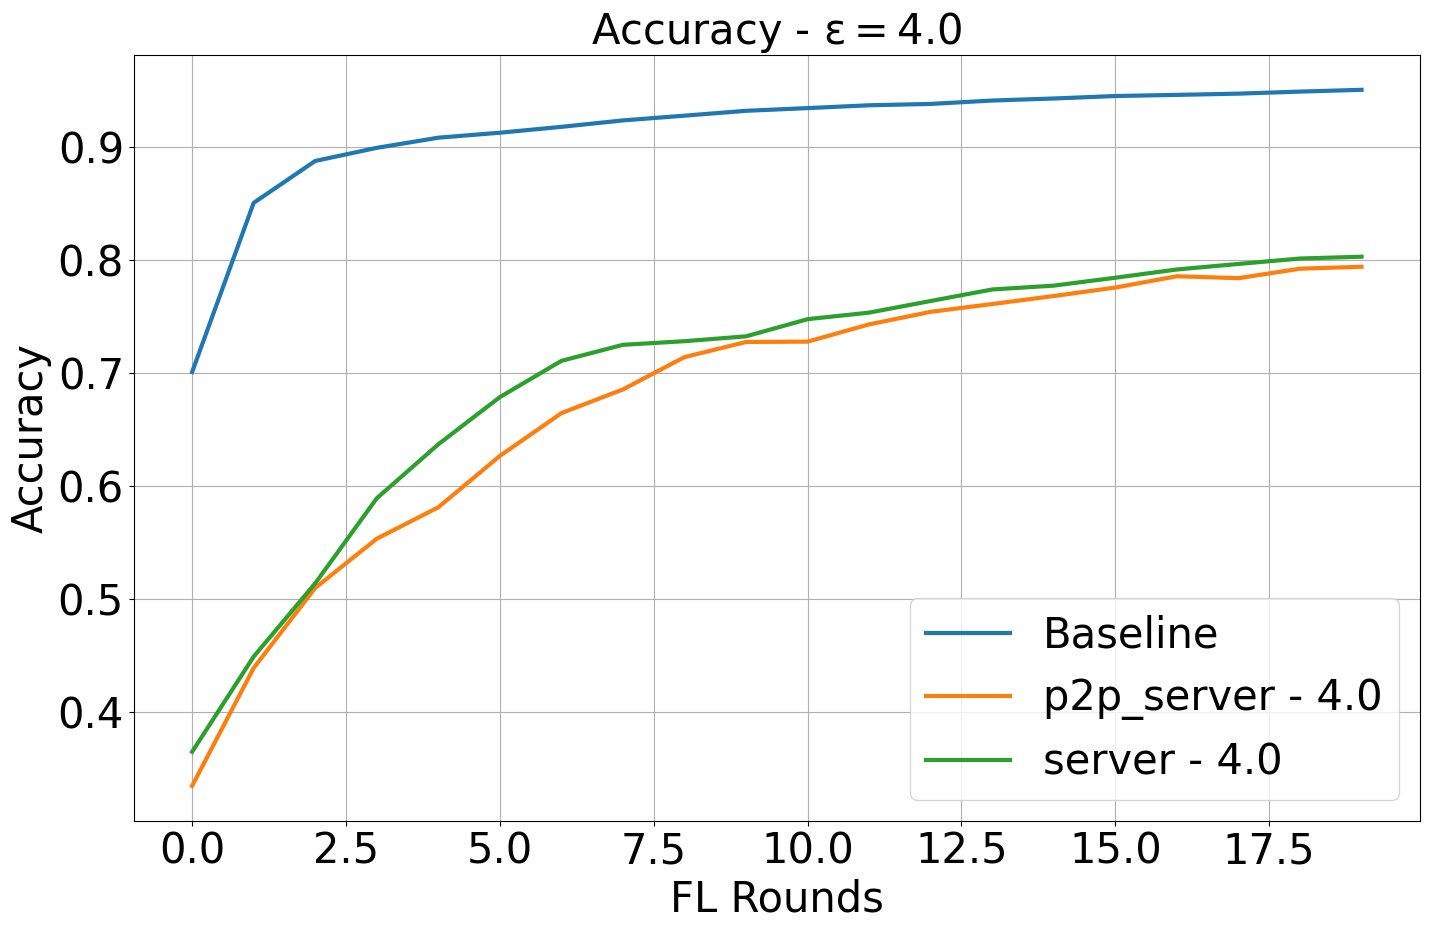

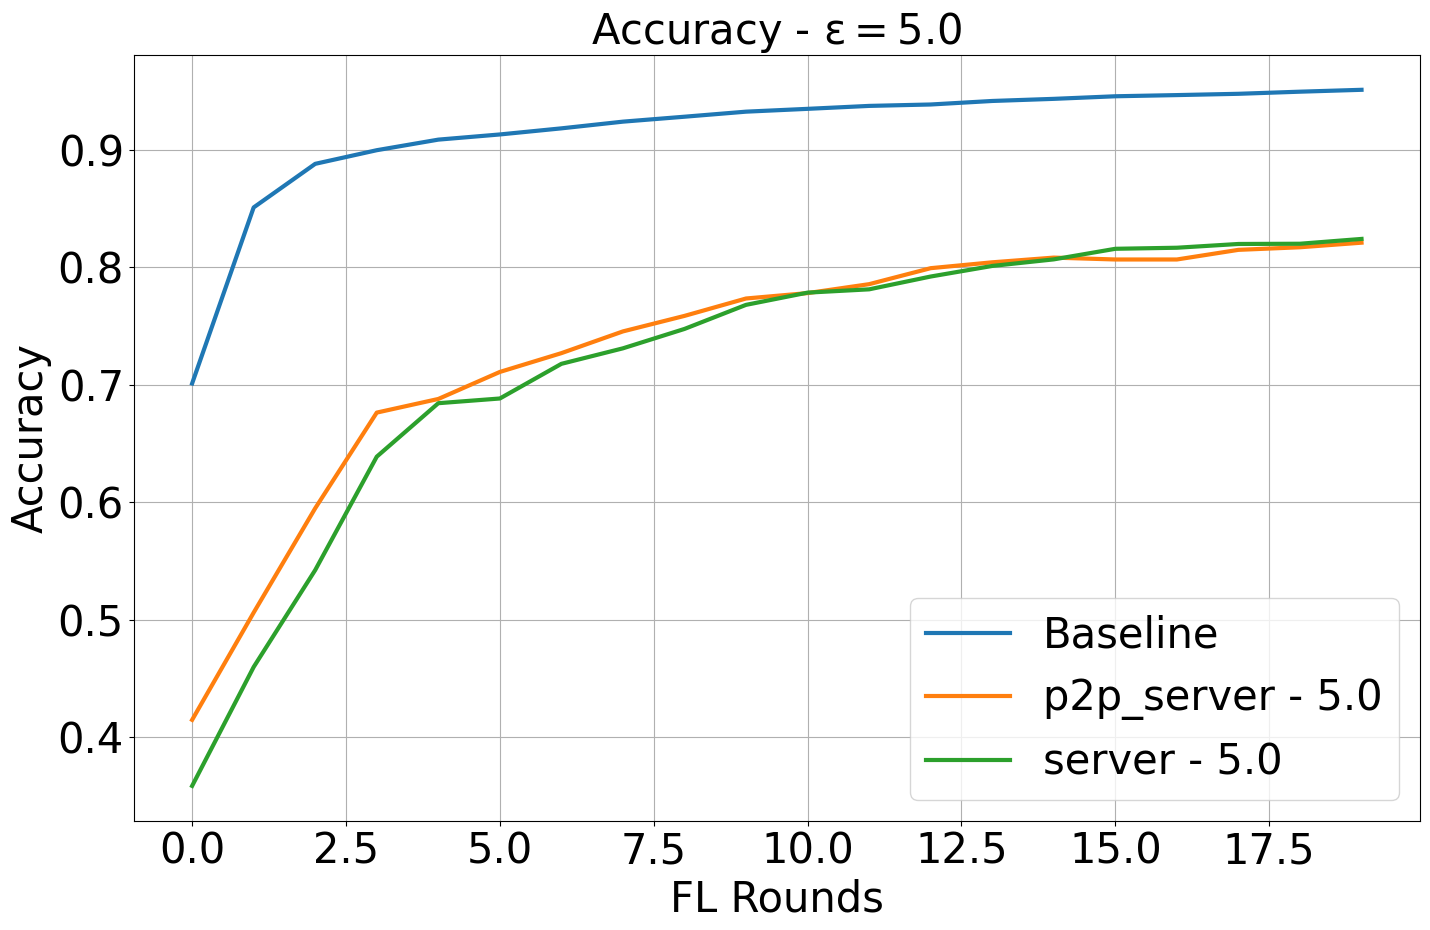

In [9]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.2", dataset_name="mnist")

# 30% Public

In [10]:
wandb_data = {
    "p2p_server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/dj4b2rf6"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/iqqwaxti"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/yq2dpzi5"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/73cfmfvk"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/35fm5alp"),
    },
    "server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/snvzngdb"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/3qwonhkz"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/da6w1iav"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ngbj35hy"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/k6pdd6qk"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}
differences = compute_difference(test_accuracy, "p2p_server", "server")

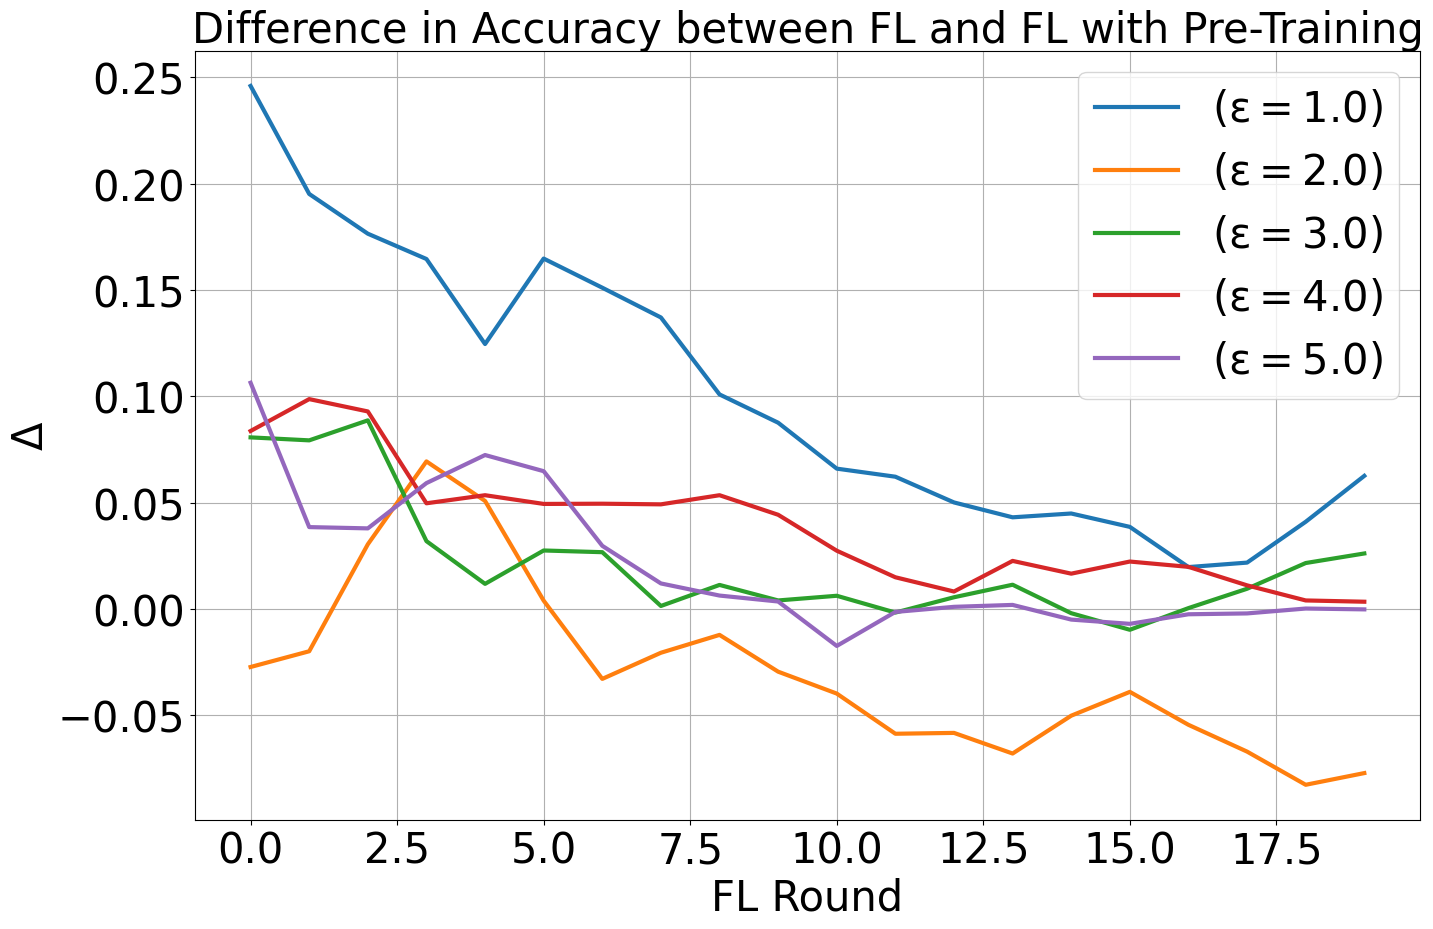

In [11]:
plot_differences(differences, dataset_name="mnist", size=0.3)

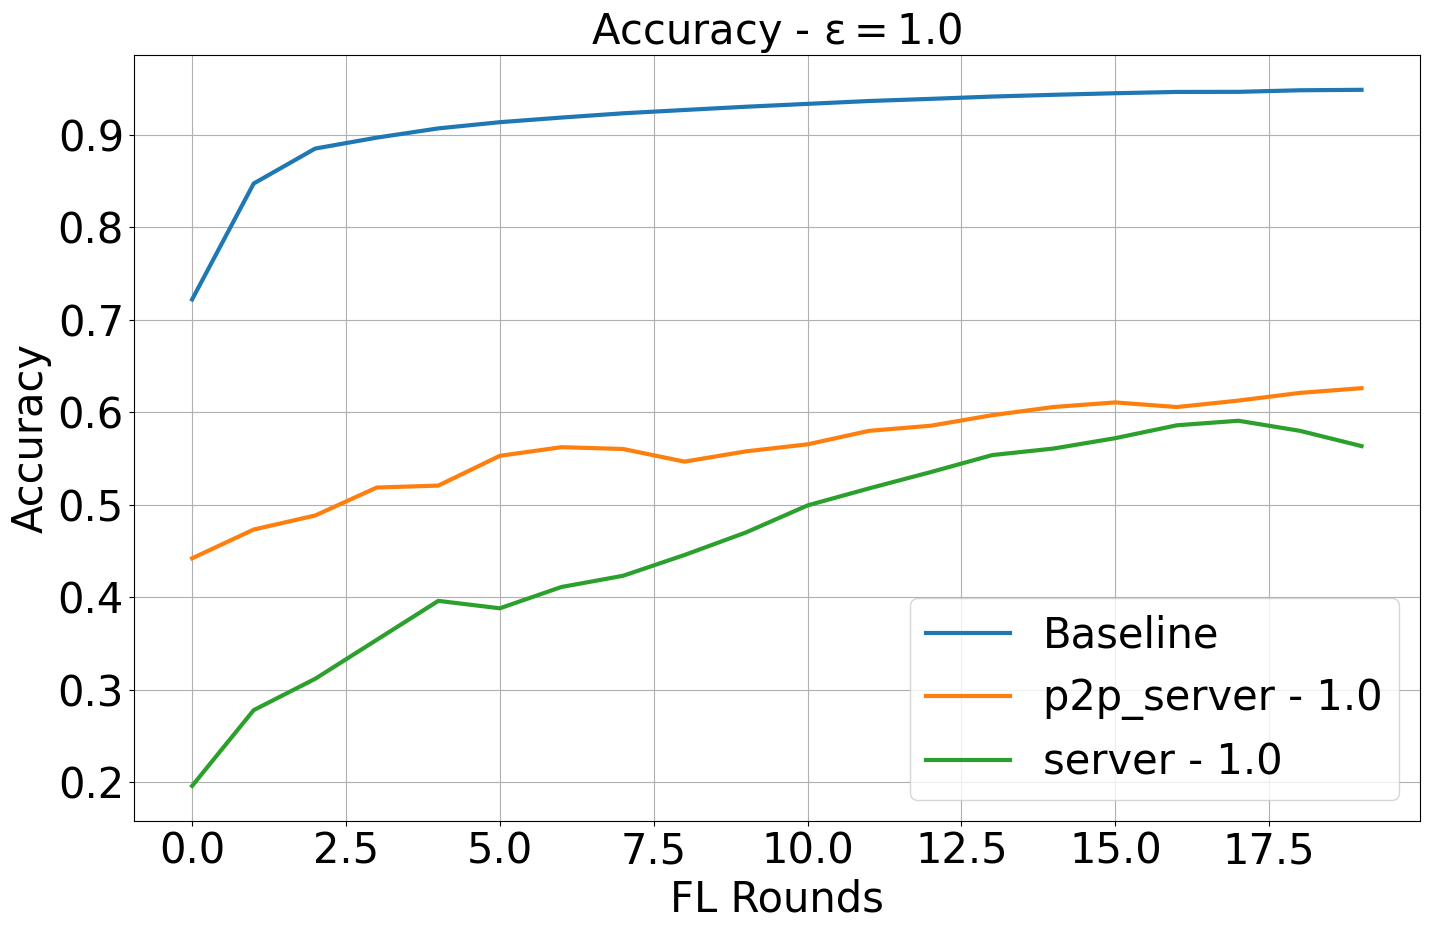

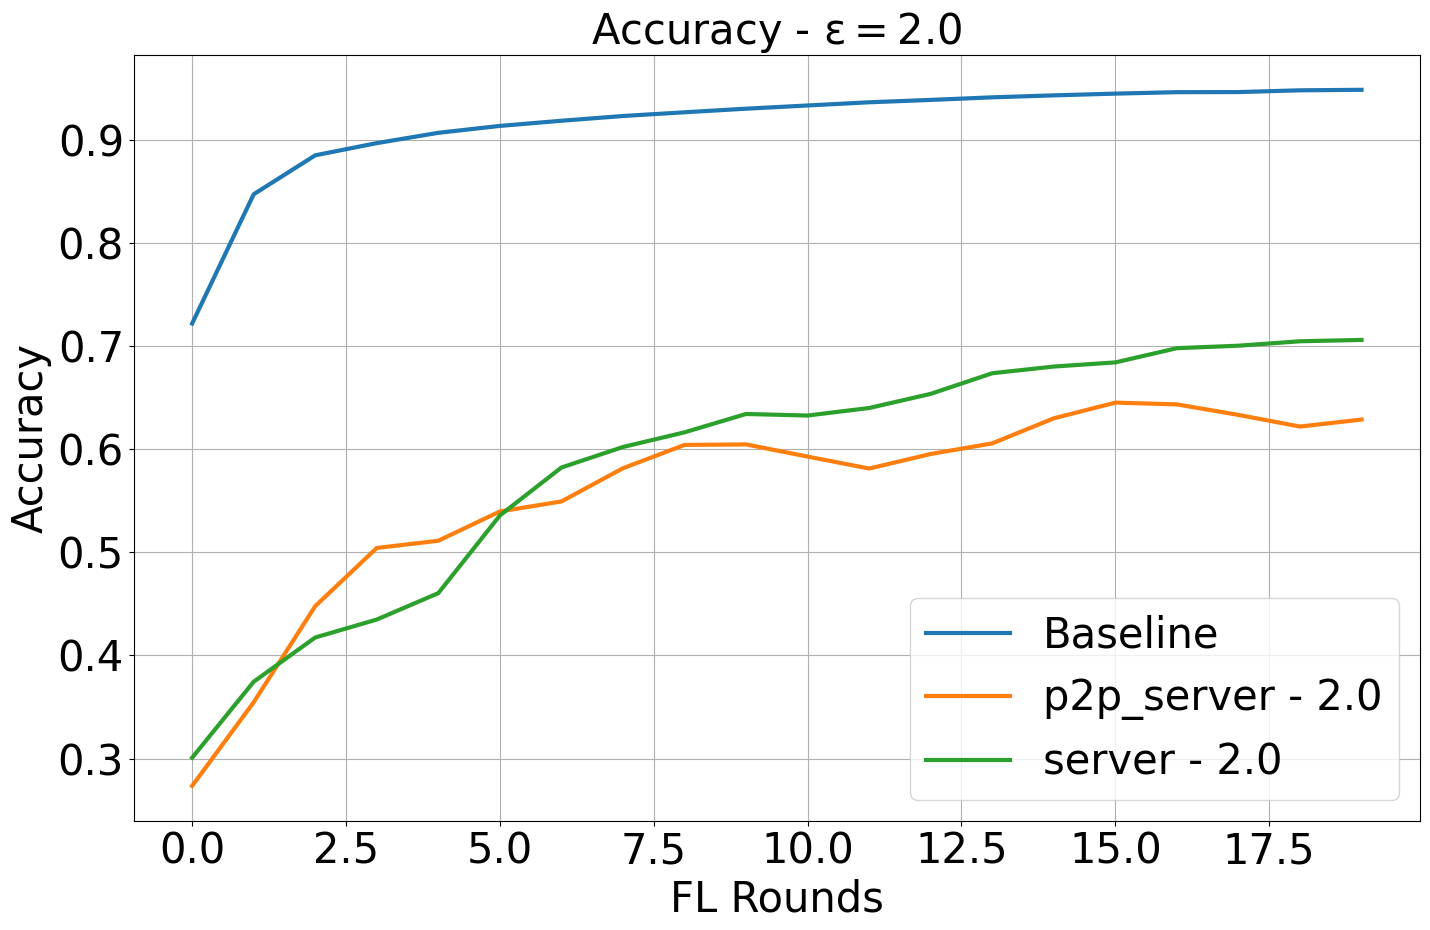

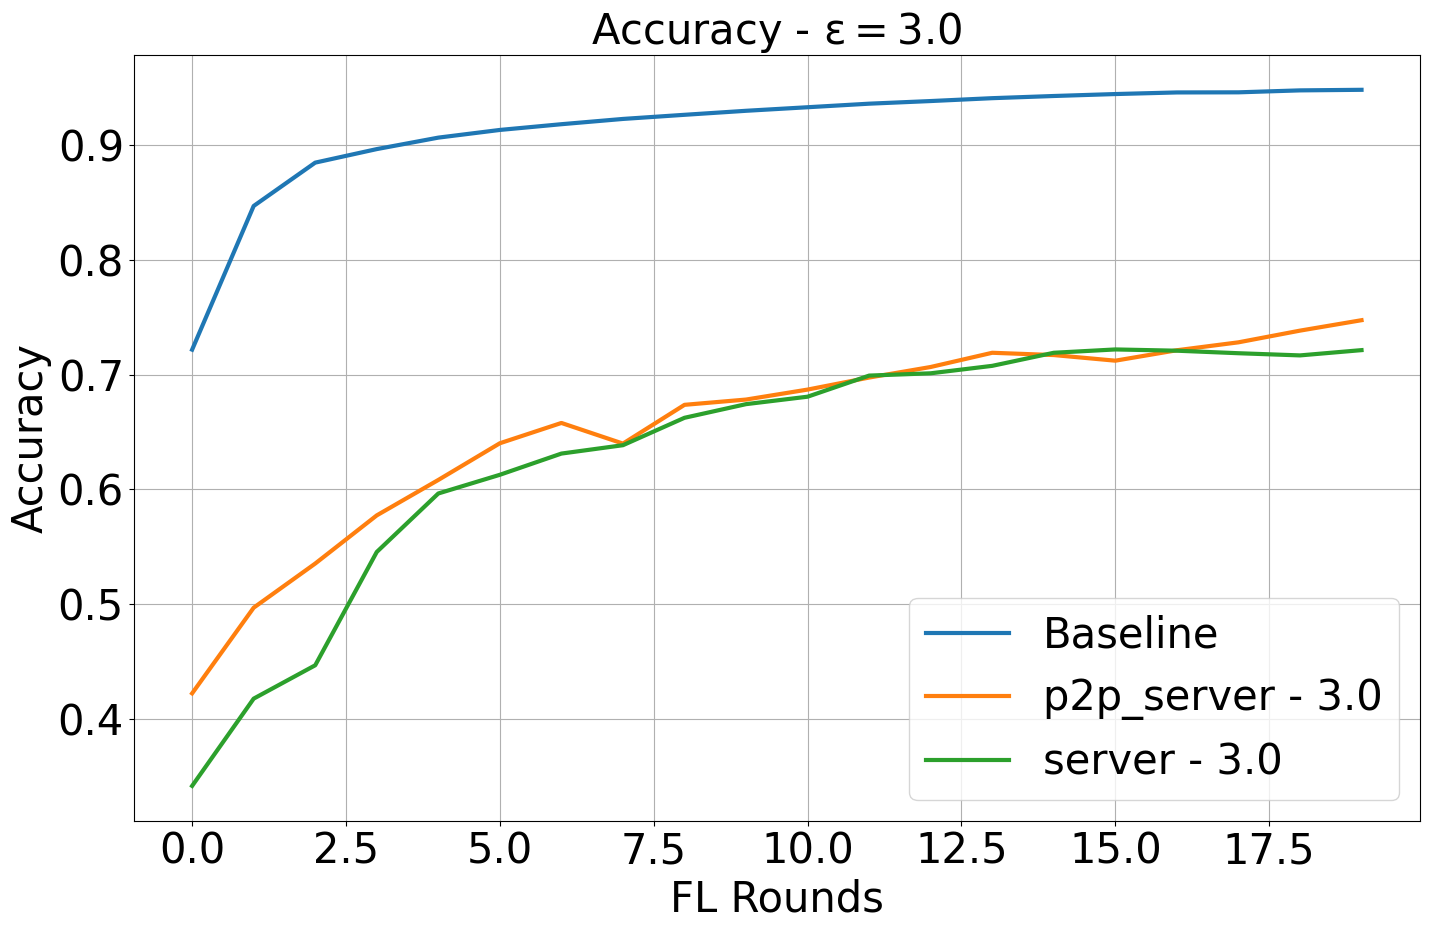

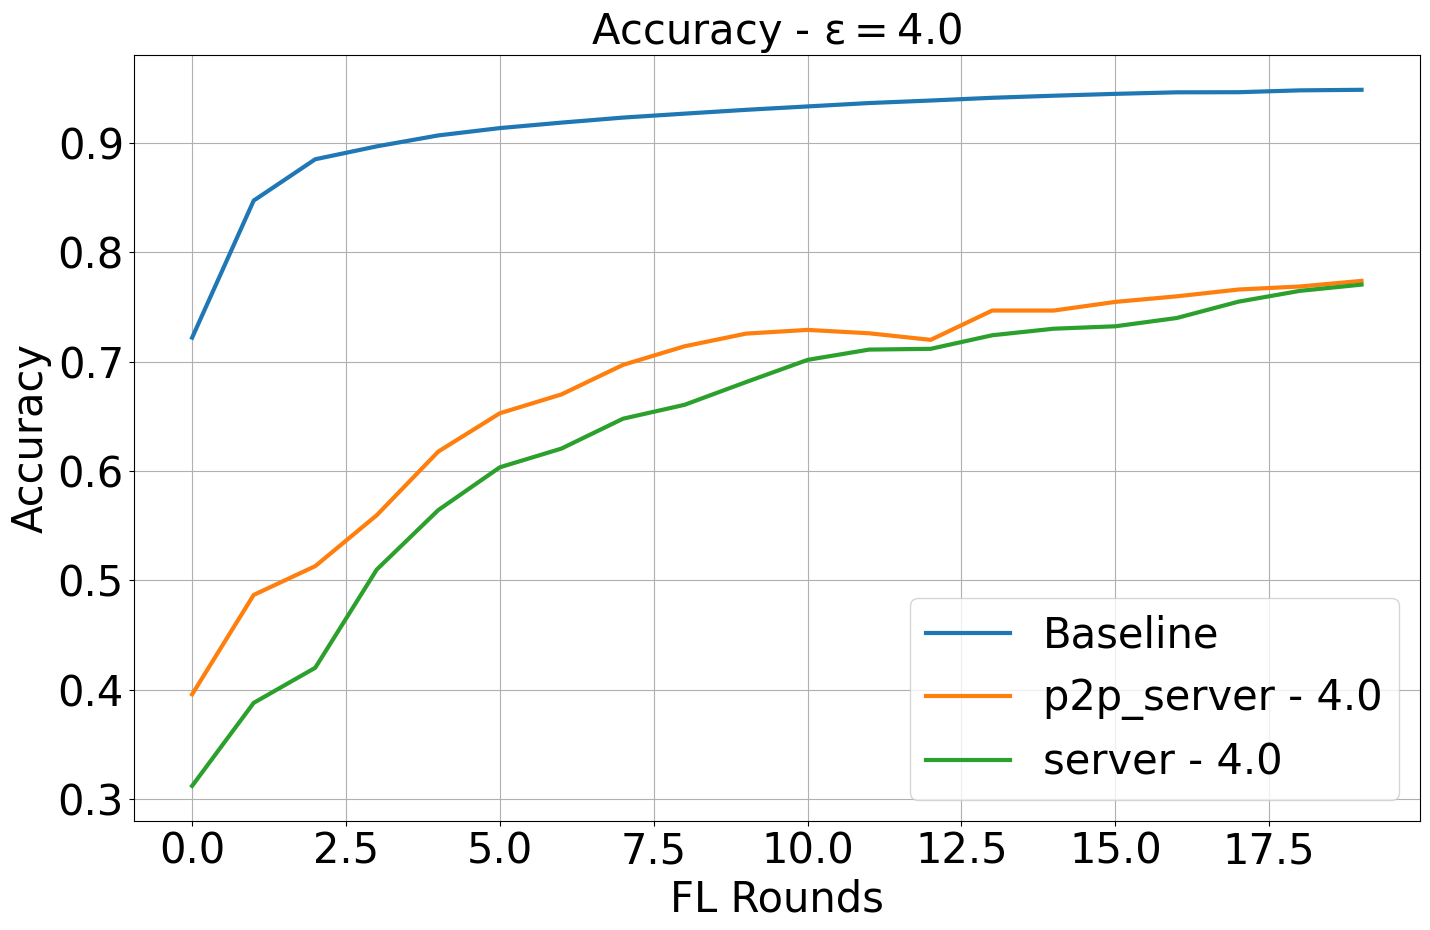

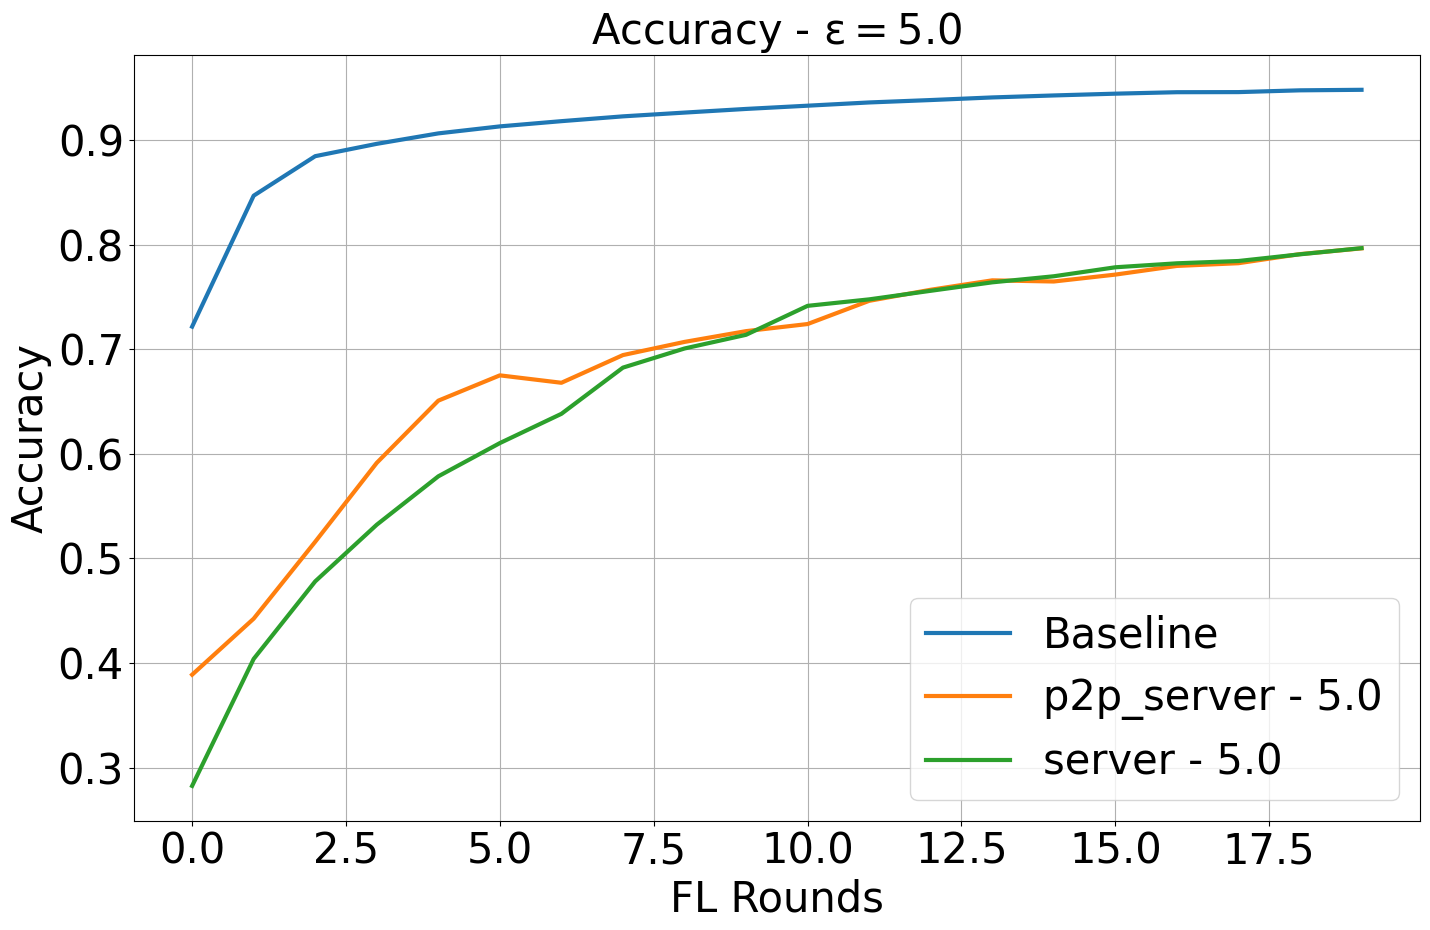

In [12]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.3", dataset_name="mnist")

# 40% Public

In [13]:
wandb_data = {
    "p2p_server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/6eda5bme"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ugt53qnb"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/q2gqaepu"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/5iwbkha3"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/nq8omloh"),
    },
    "server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/8tpgvhpj"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/u0zc7qxl"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/d6vzhusb"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/eaxl8yoz"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/b7urc3xk"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

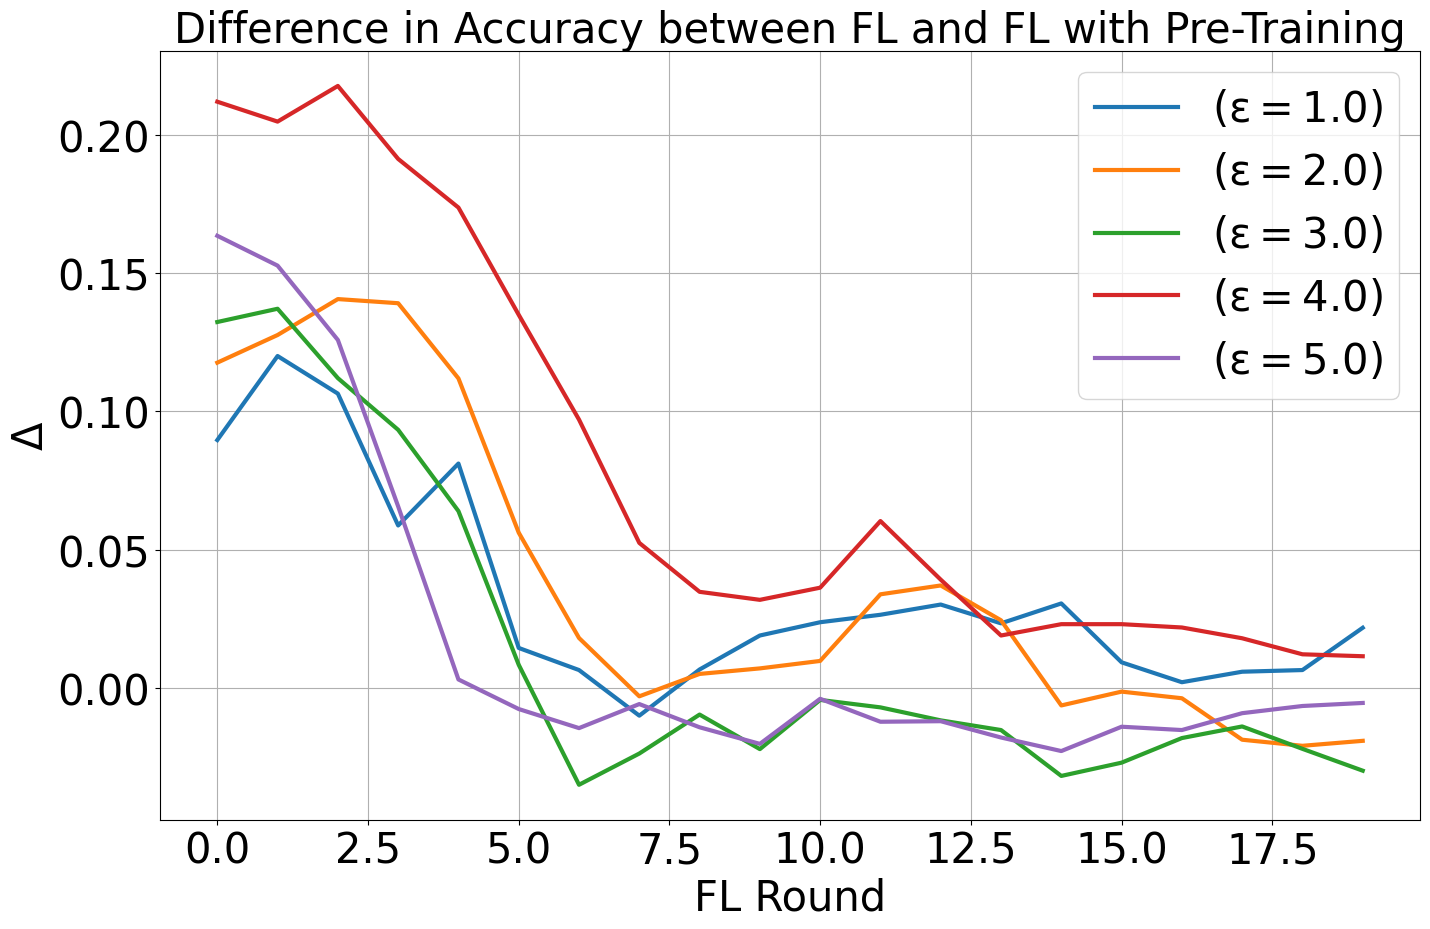

In [14]:
plot_differences(differences, dataset_name="mnist", size=0.4)

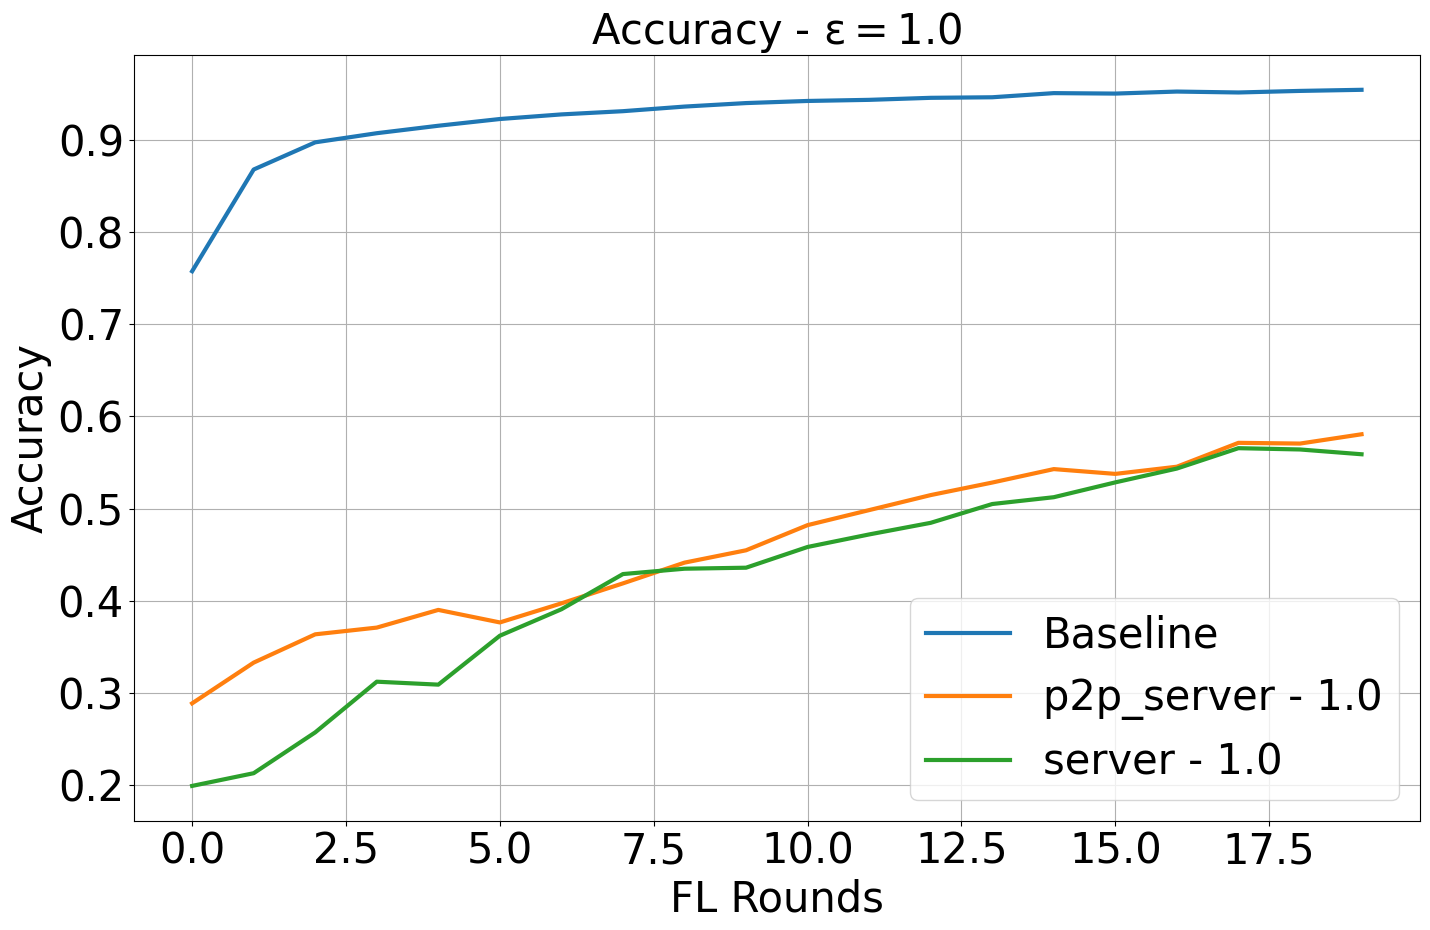

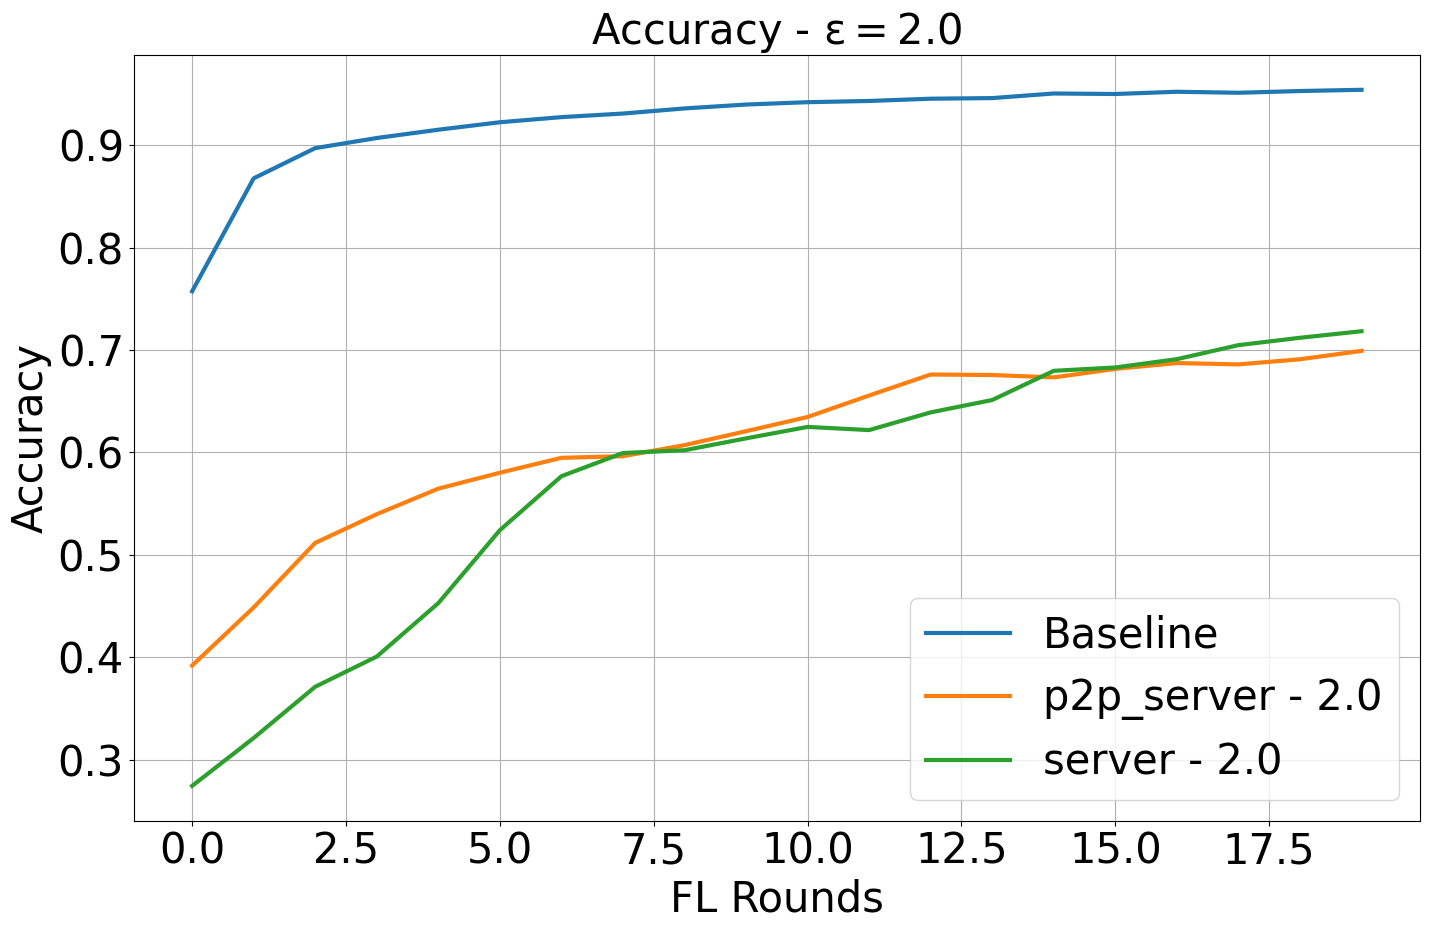

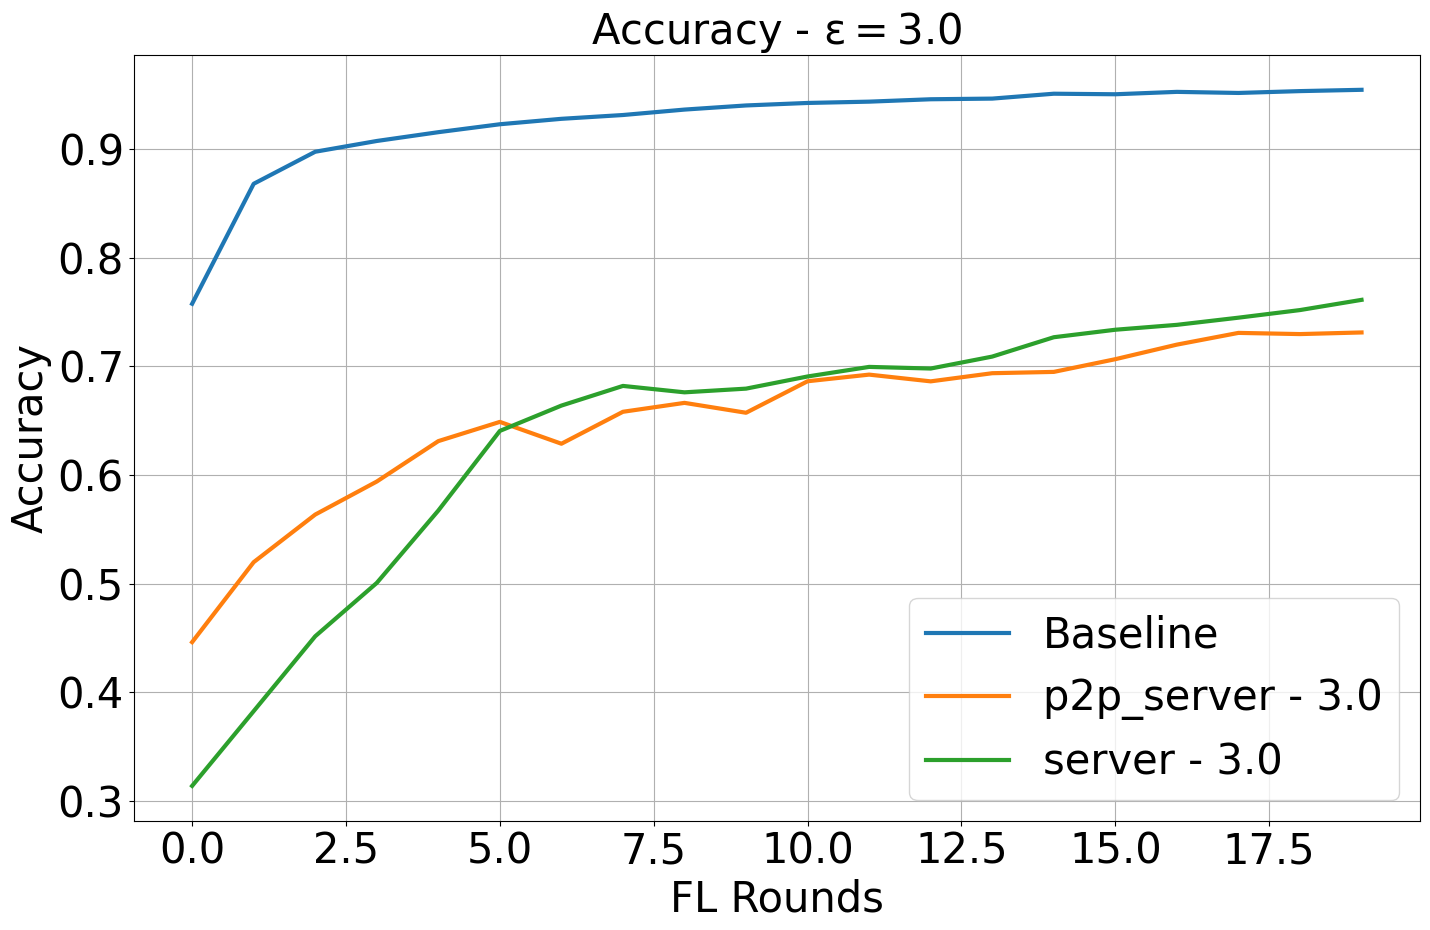

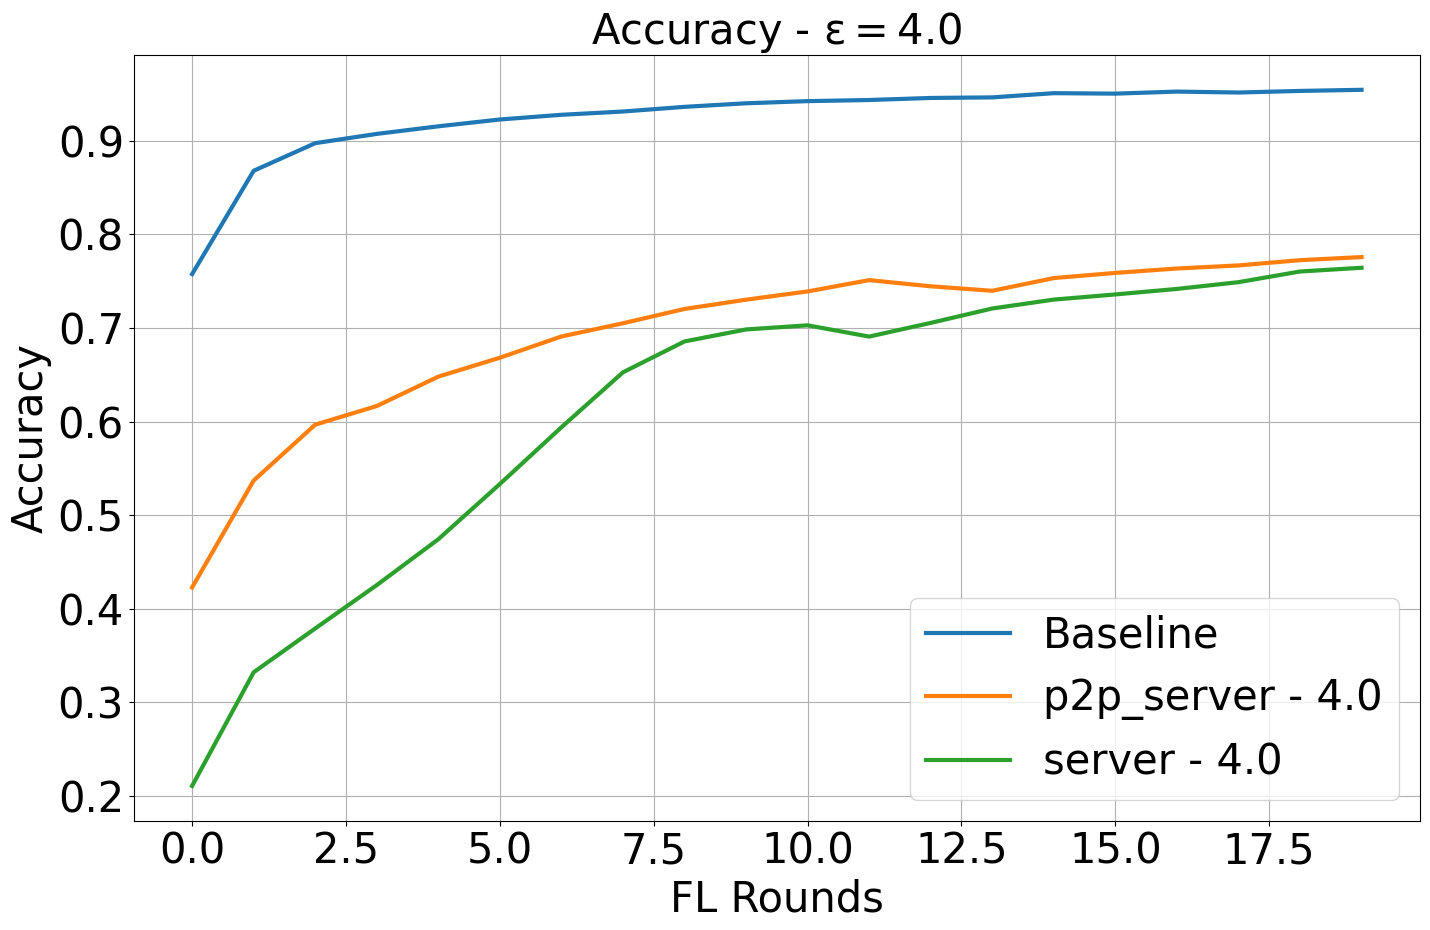

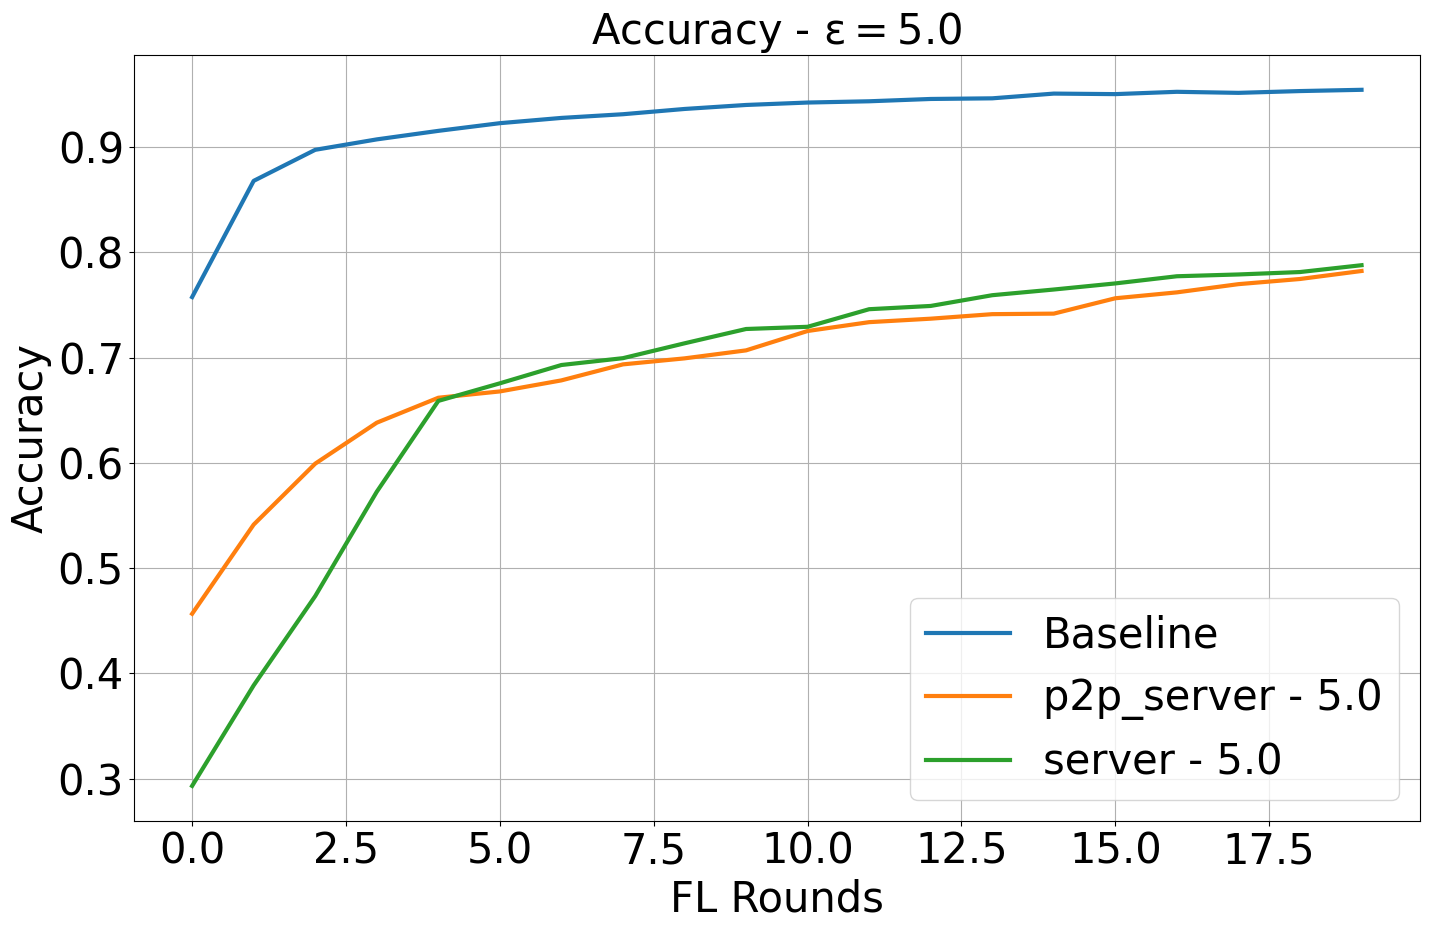

In [15]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.4", dataset_name="mnist")

# Dutch

In [16]:
baselines = {
    "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/u94k8z1z"),
    "0.3": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/e95tu6oc"),
    "0.4": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/64yyqimn"),
    "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/5j6s3cch"),
    "0.6": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/xre334u9"),
}
baselines_accuracy = {
    experiment_name: remove_nan(value, "Test Accuracy on the server")
    for experiment_name, value in baselines.items()
}

# 20% Public

In [17]:
wandb_data = {
    "p2p_server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/mpkn4ywz"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/hhocjgbz"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/awwey9ht"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/x9xhanw4"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/d7votfim"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/di5reg2p"),
    },
    "server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/luvg8e2q"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/em7prv29"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/ouigvgag"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/b1mw4mba"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/hm1lv9bl"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/4dtqne3s"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

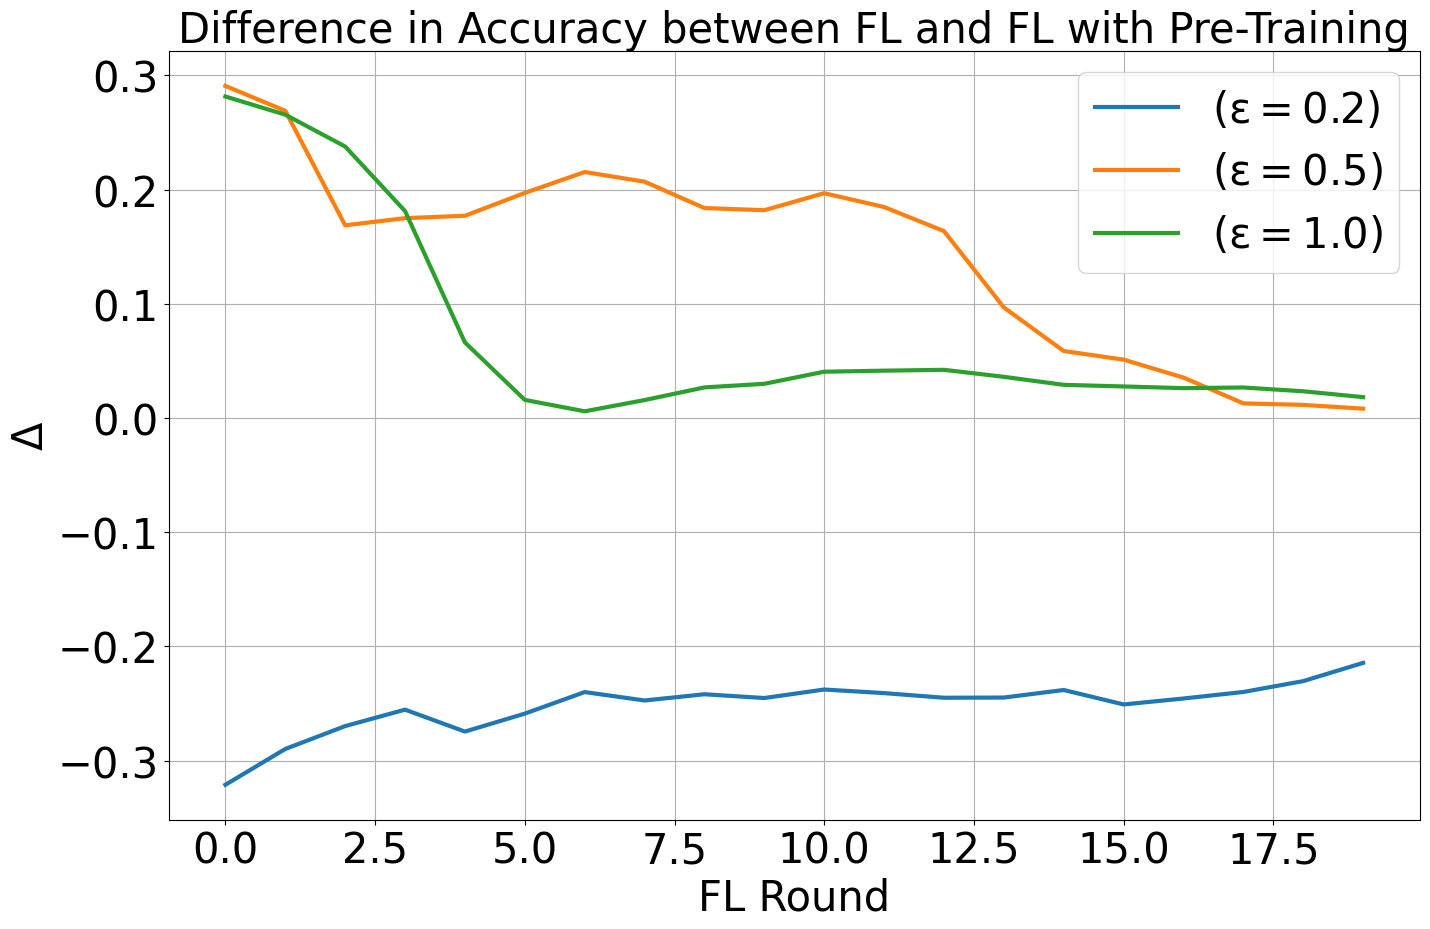

In [18]:
plot_differences(differences, dataset_name="dutch", size=0.2)

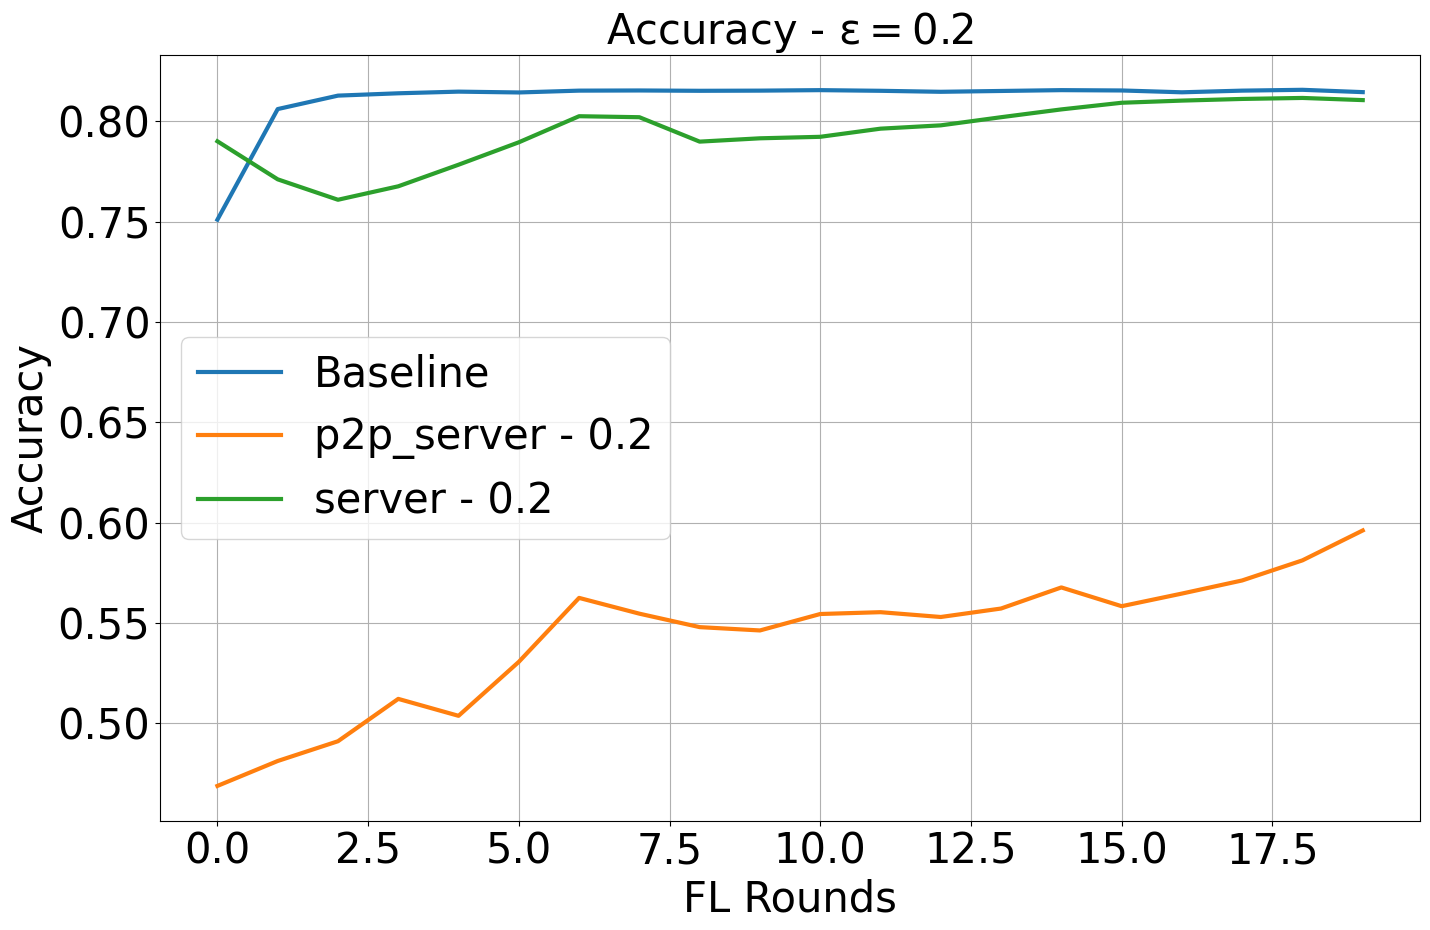

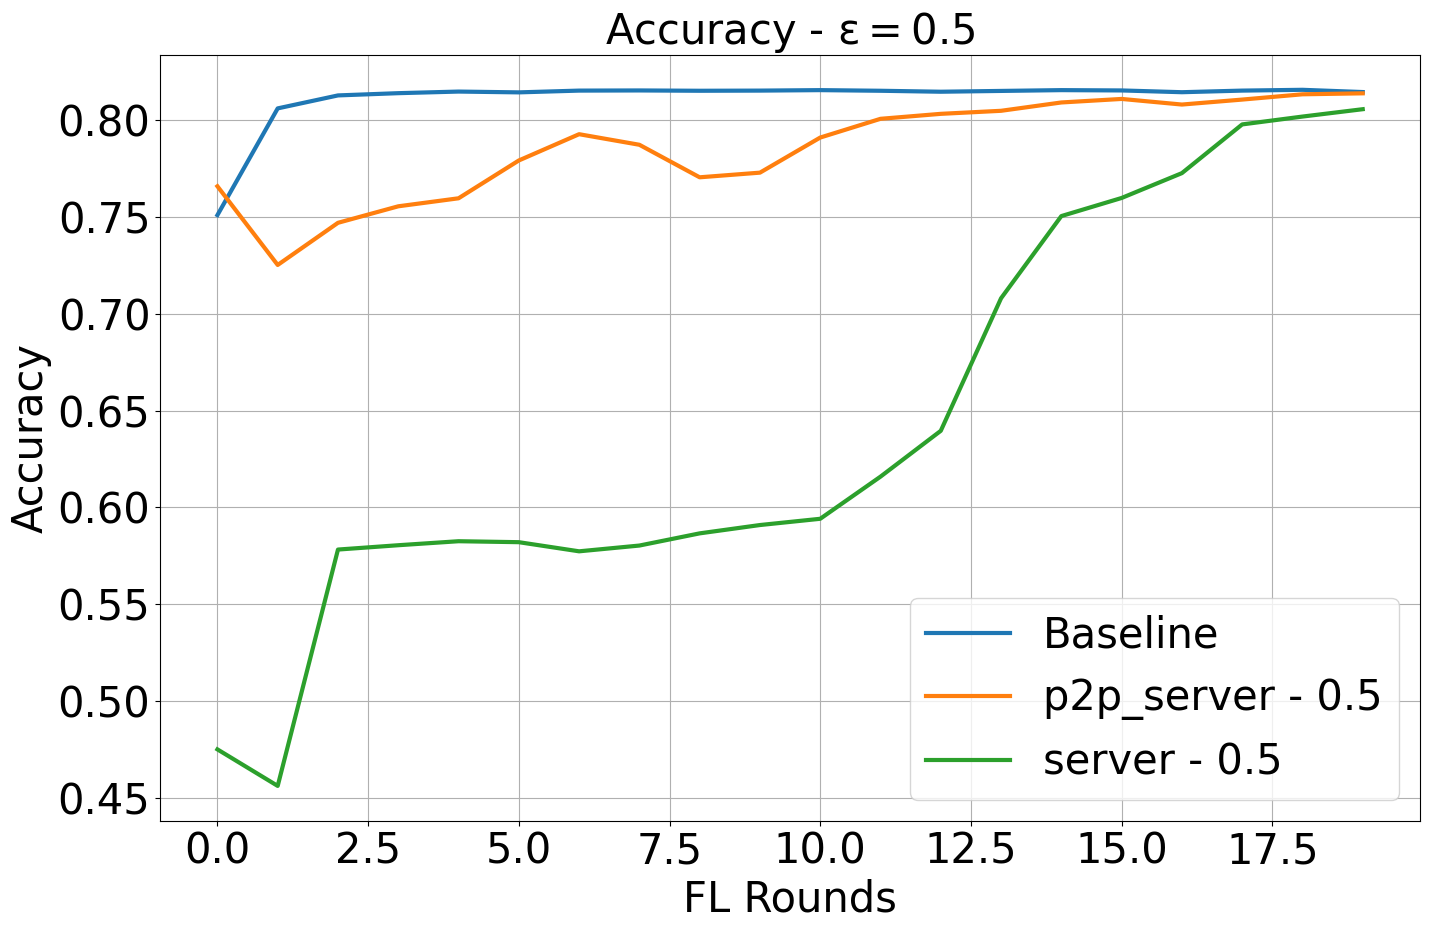

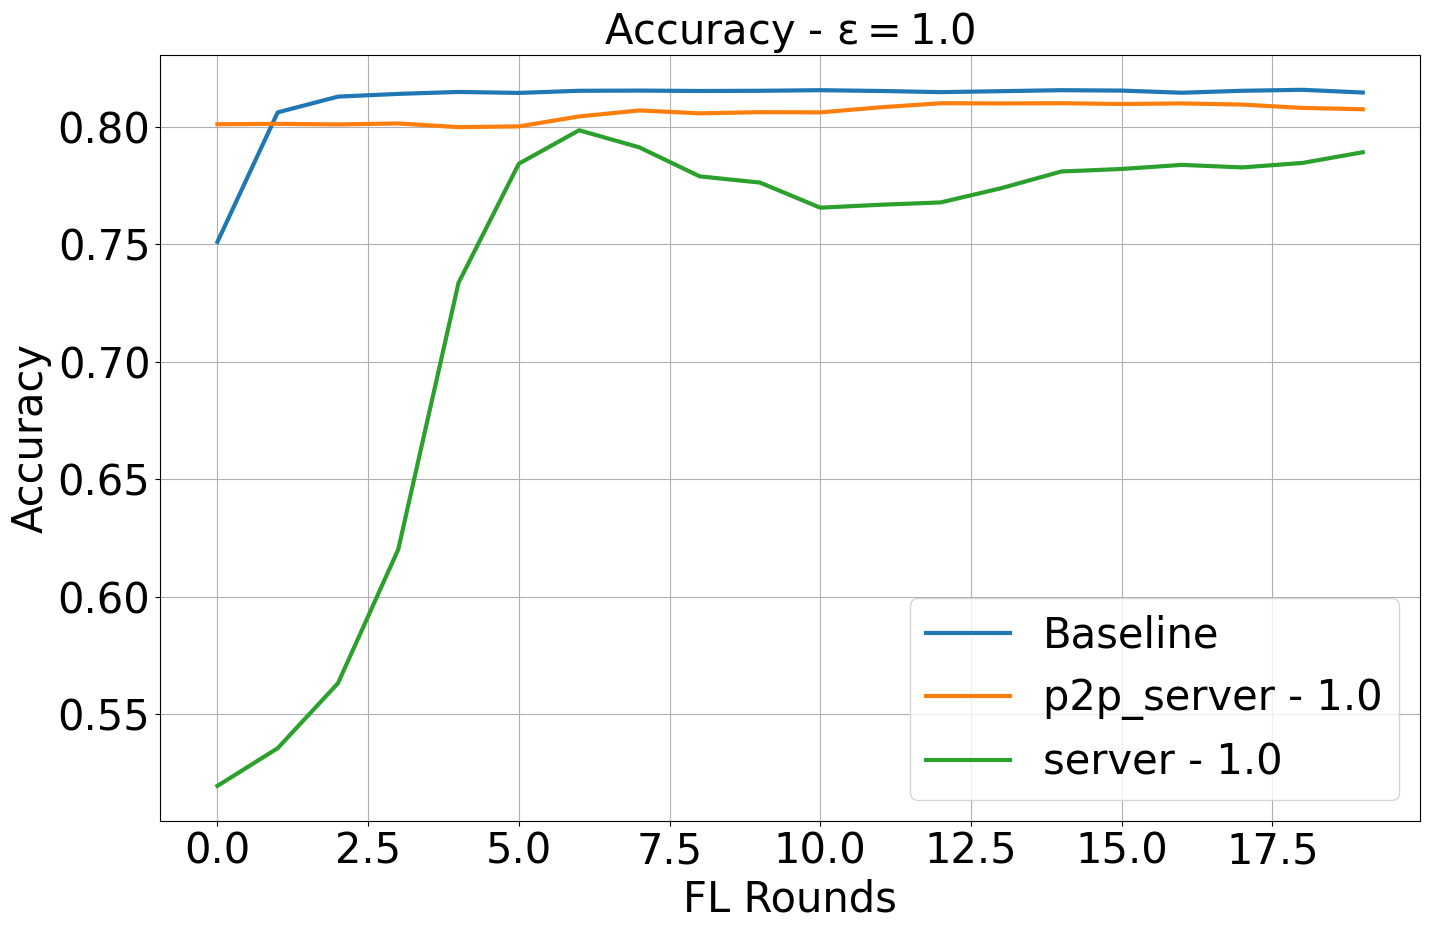

In [19]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.2", dataset_name="dutch")

# 30% Public

In [20]:
wandb_data = {
    "p2p_server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/f65rkews"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/3qsn6ed2"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/5cjmnupl"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/7czy8phs"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/77ypwxpy"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/81eum7y7"),
    },
    "server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/2gu5ltzd"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/xwi86d3v"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/zoivhvqv"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/c84ur335"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/jggc2e46"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/4qaer27o"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}
differences = compute_difference(test_accuracy, "p2p_server", "server")

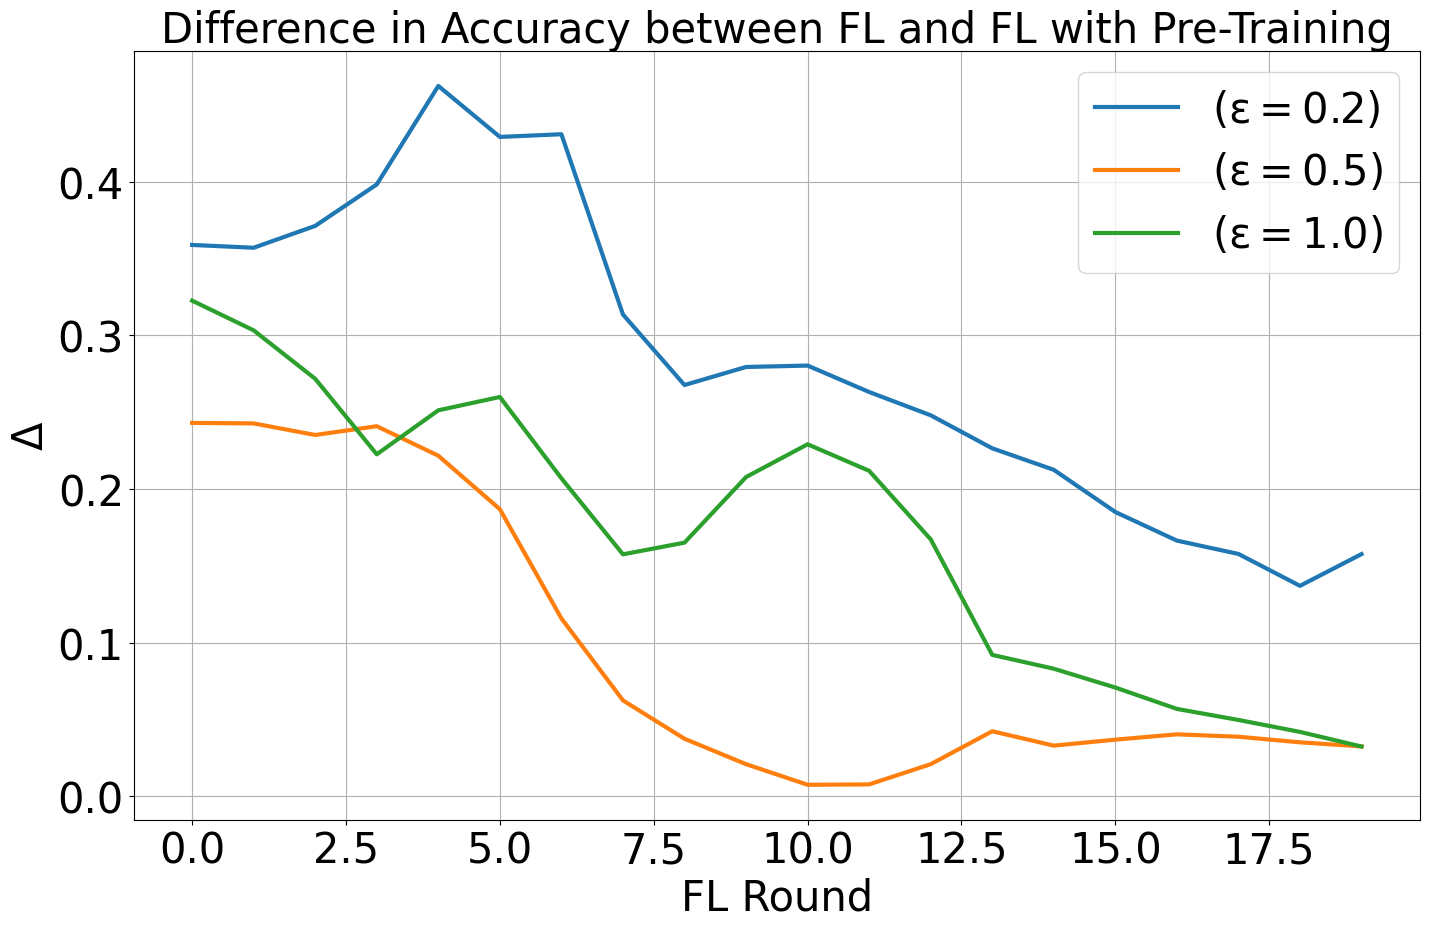

In [21]:
plot_differences(differences, dataset_name="dutch", size=0.3)

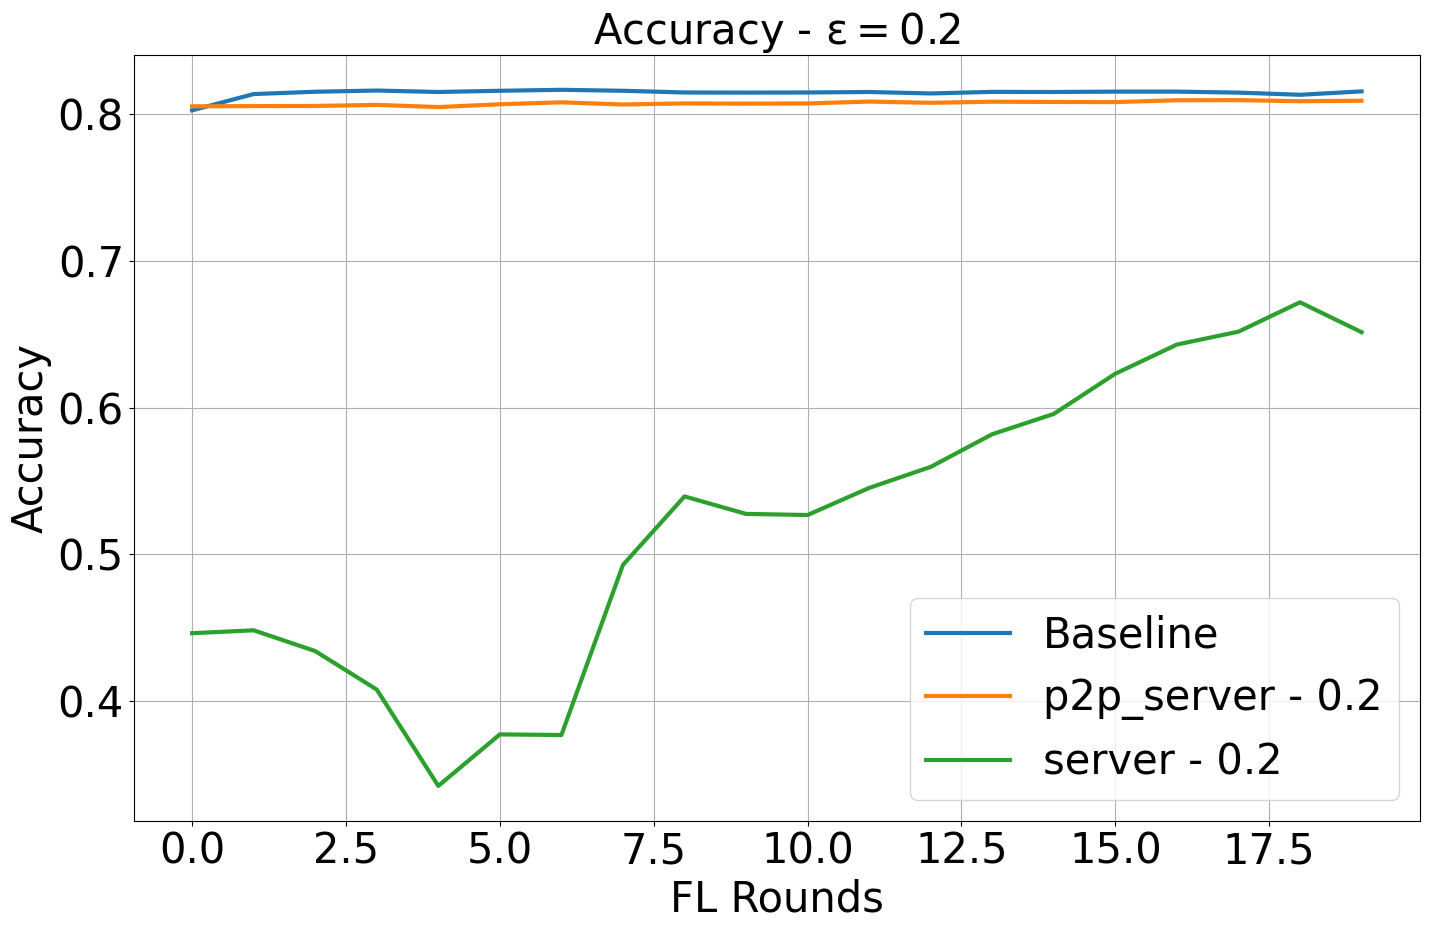

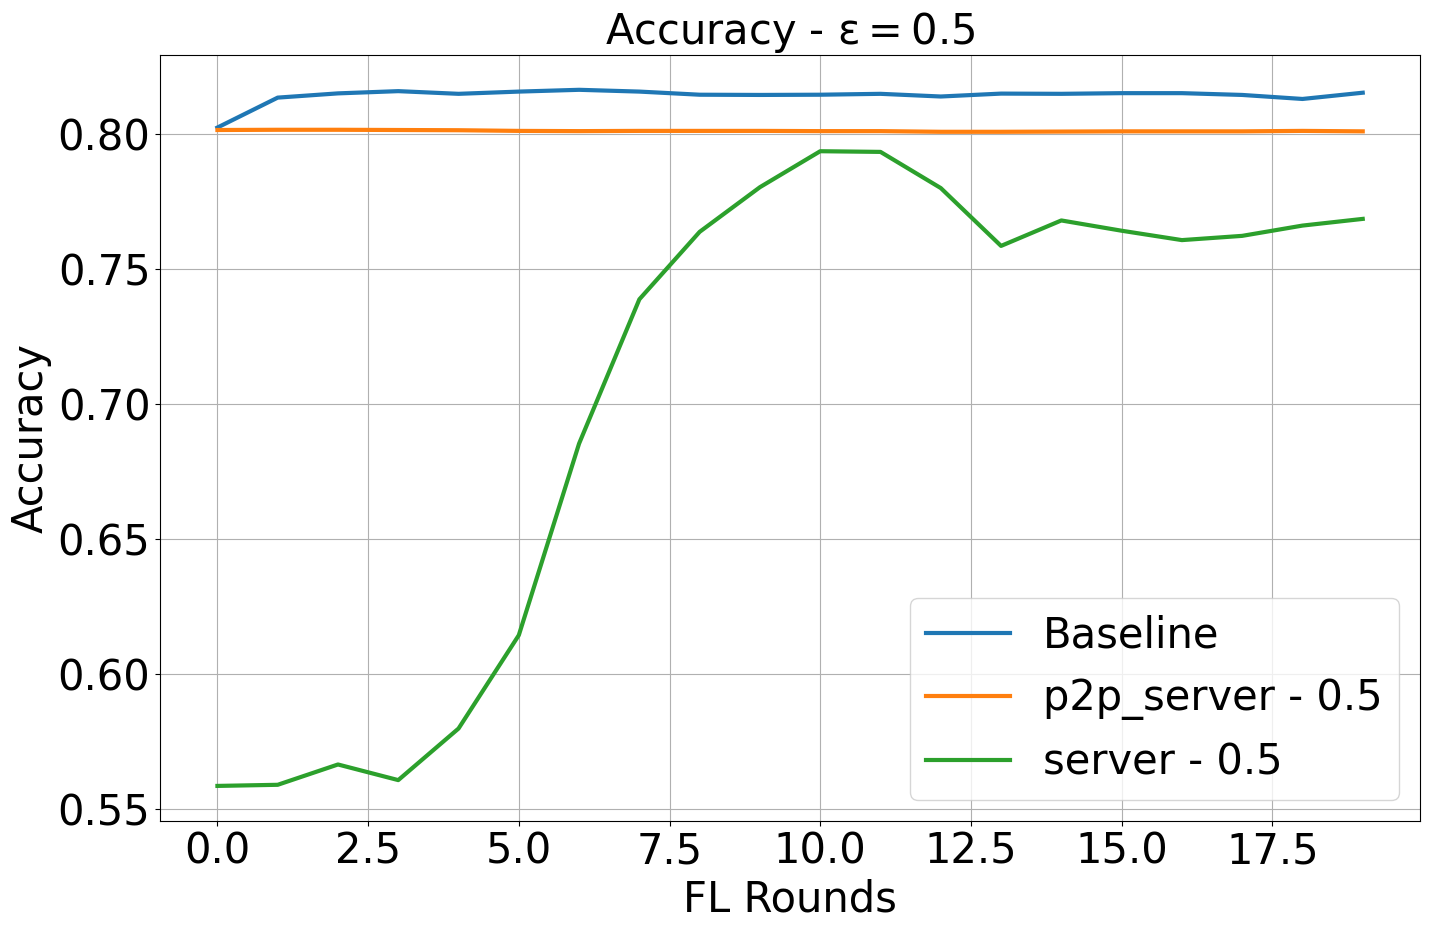

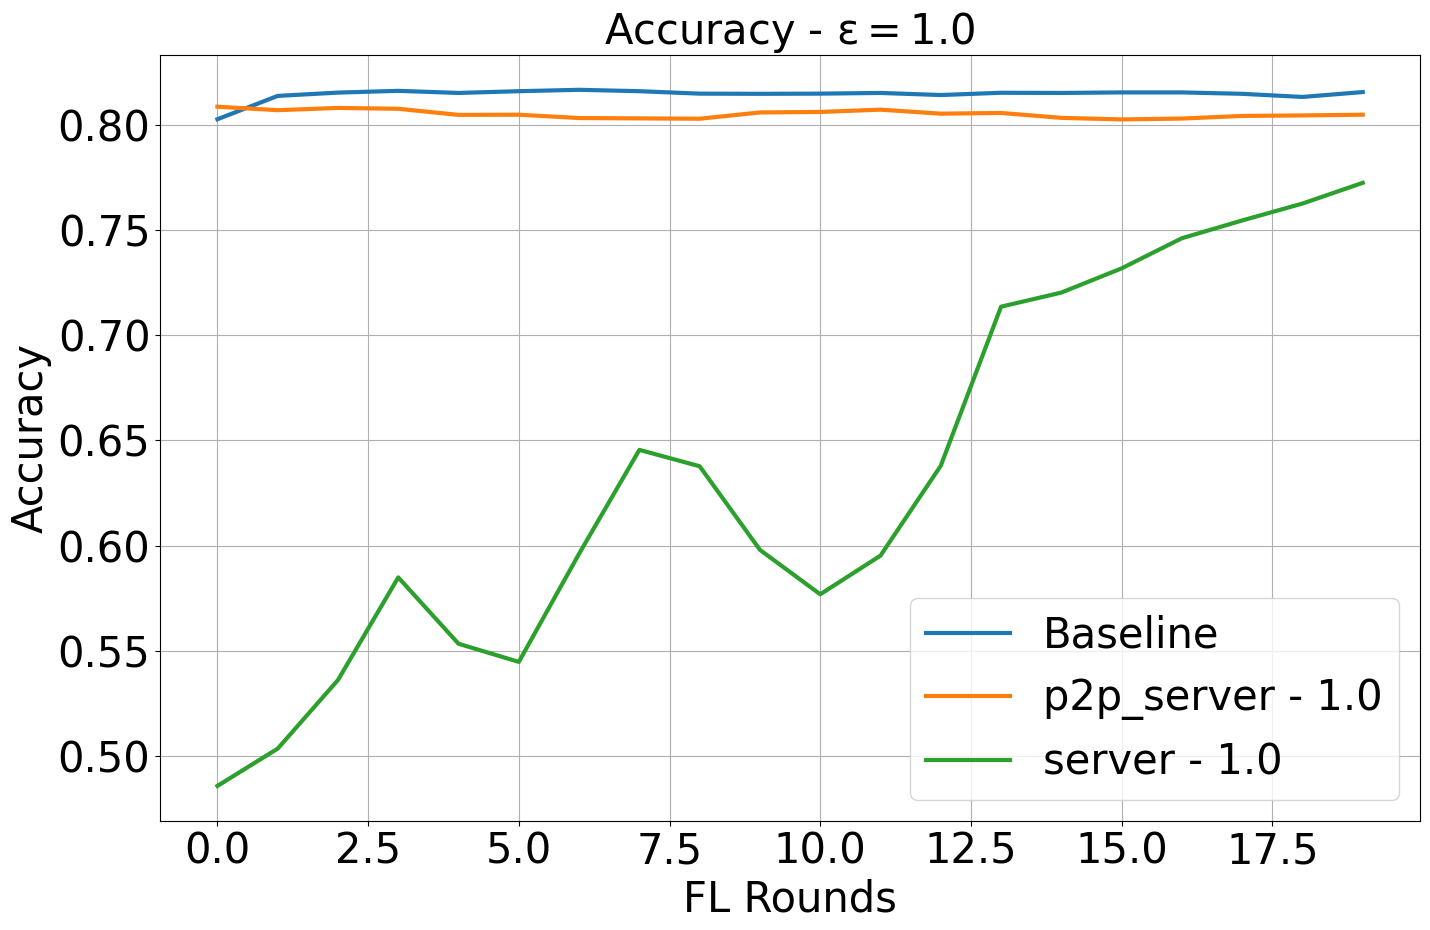

In [22]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.3", dataset_name="dutch")

# 40% Public

In [23]:
wandb_data = {
    "p2p_server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/8xdj66z5"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/z78d5w8p"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/7o9uxuvl"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/oe2hp4es"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/yvcwhtc0"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/g51dpxtr"),
    },
    "server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/67lxbpq5"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/5xo2b9wq"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/cv251io0"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/7v71jfdn"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/rzoknahh"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/98nqogv6"),
    },
}


test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

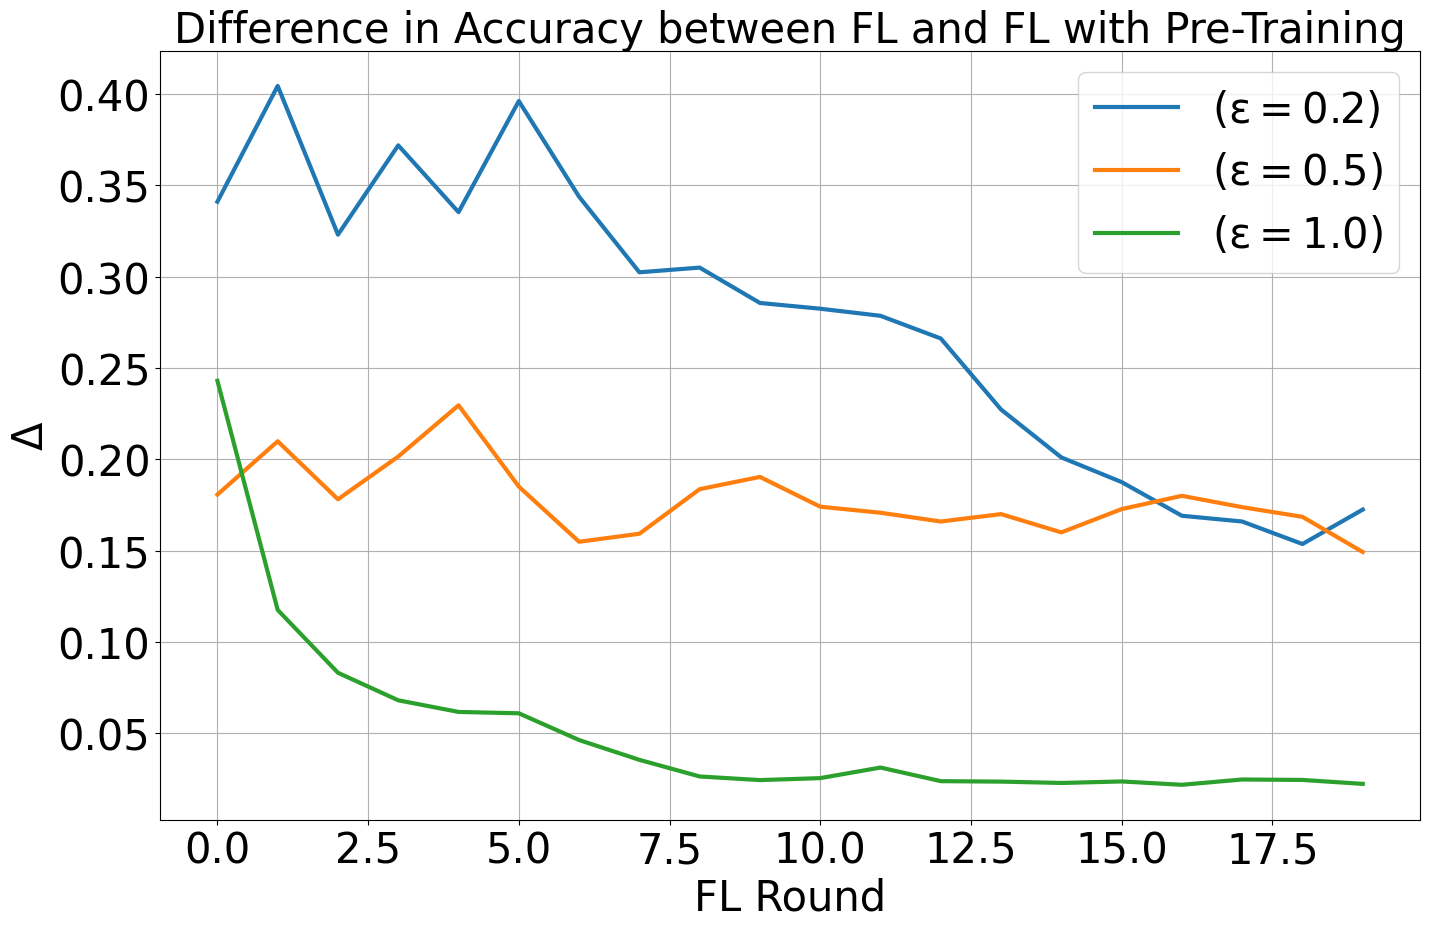

In [24]:
plot_differences(differences, dataset_name="dutch", size=0.4)

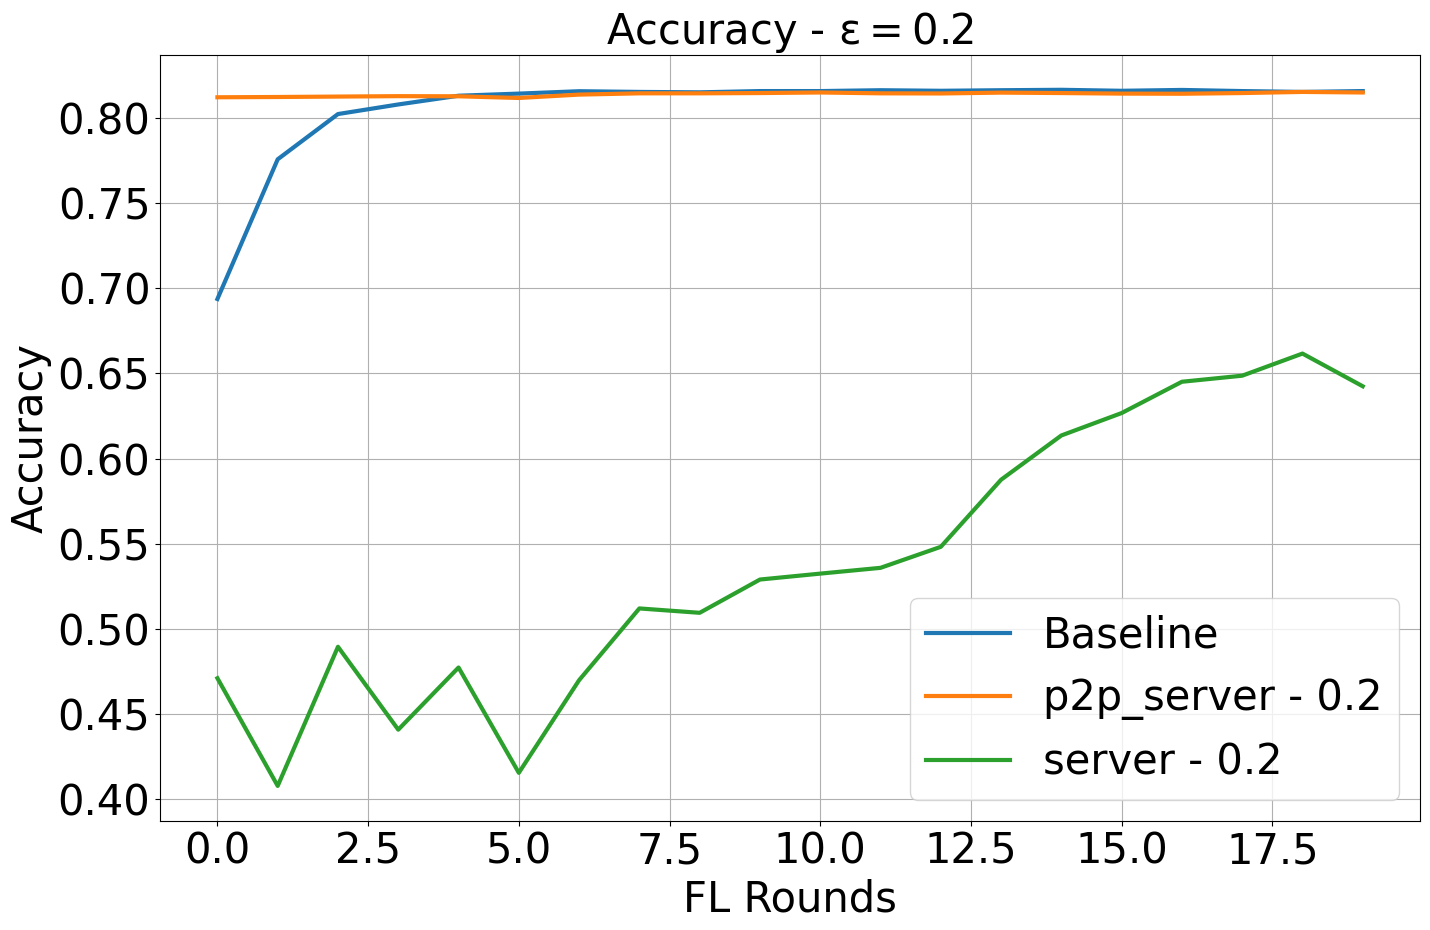

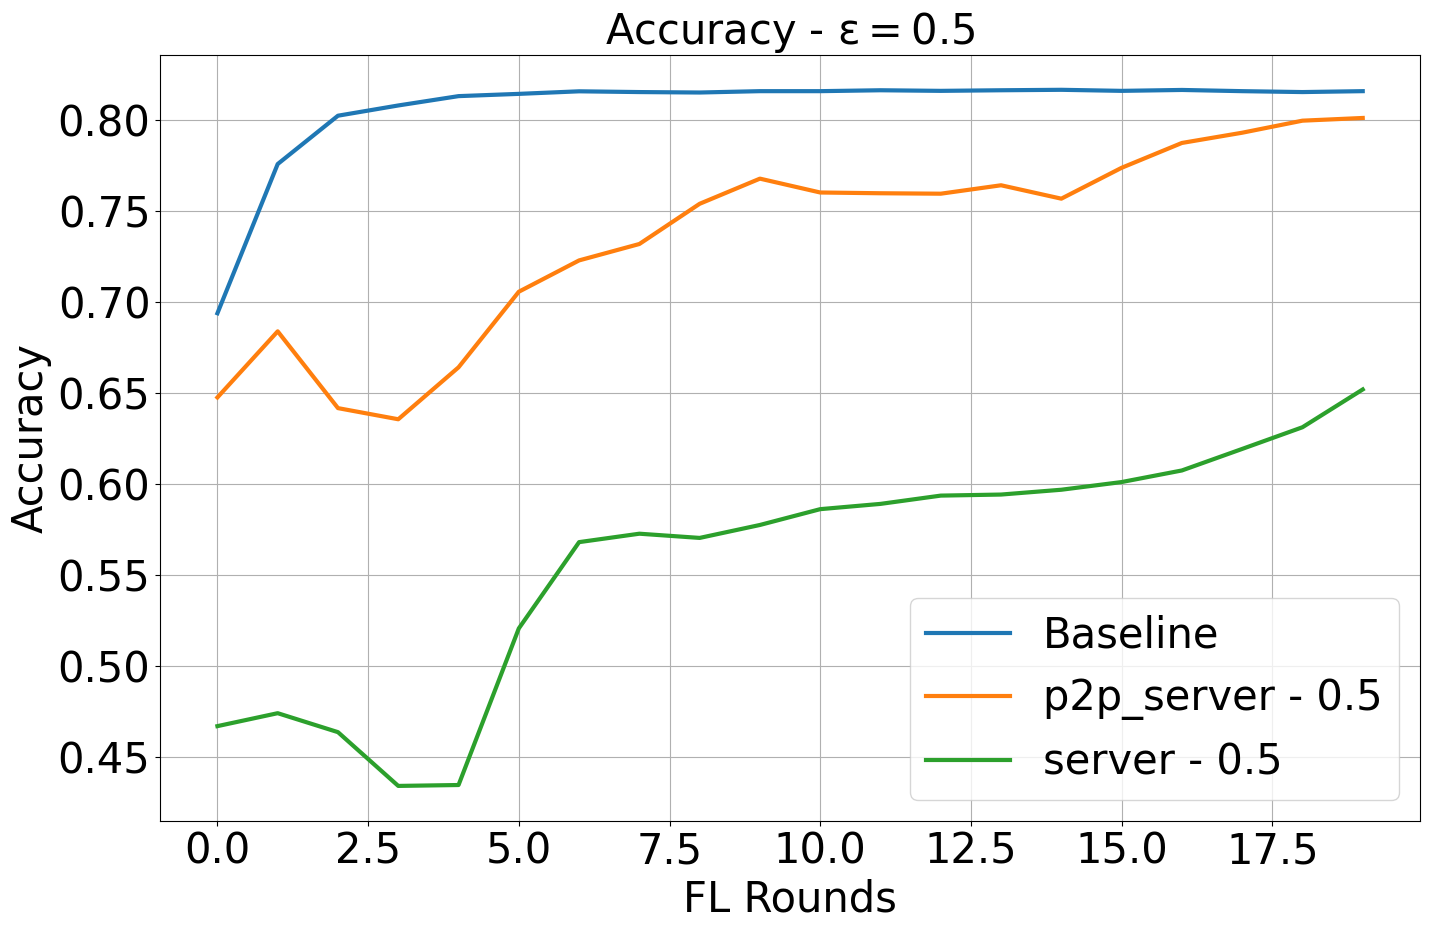

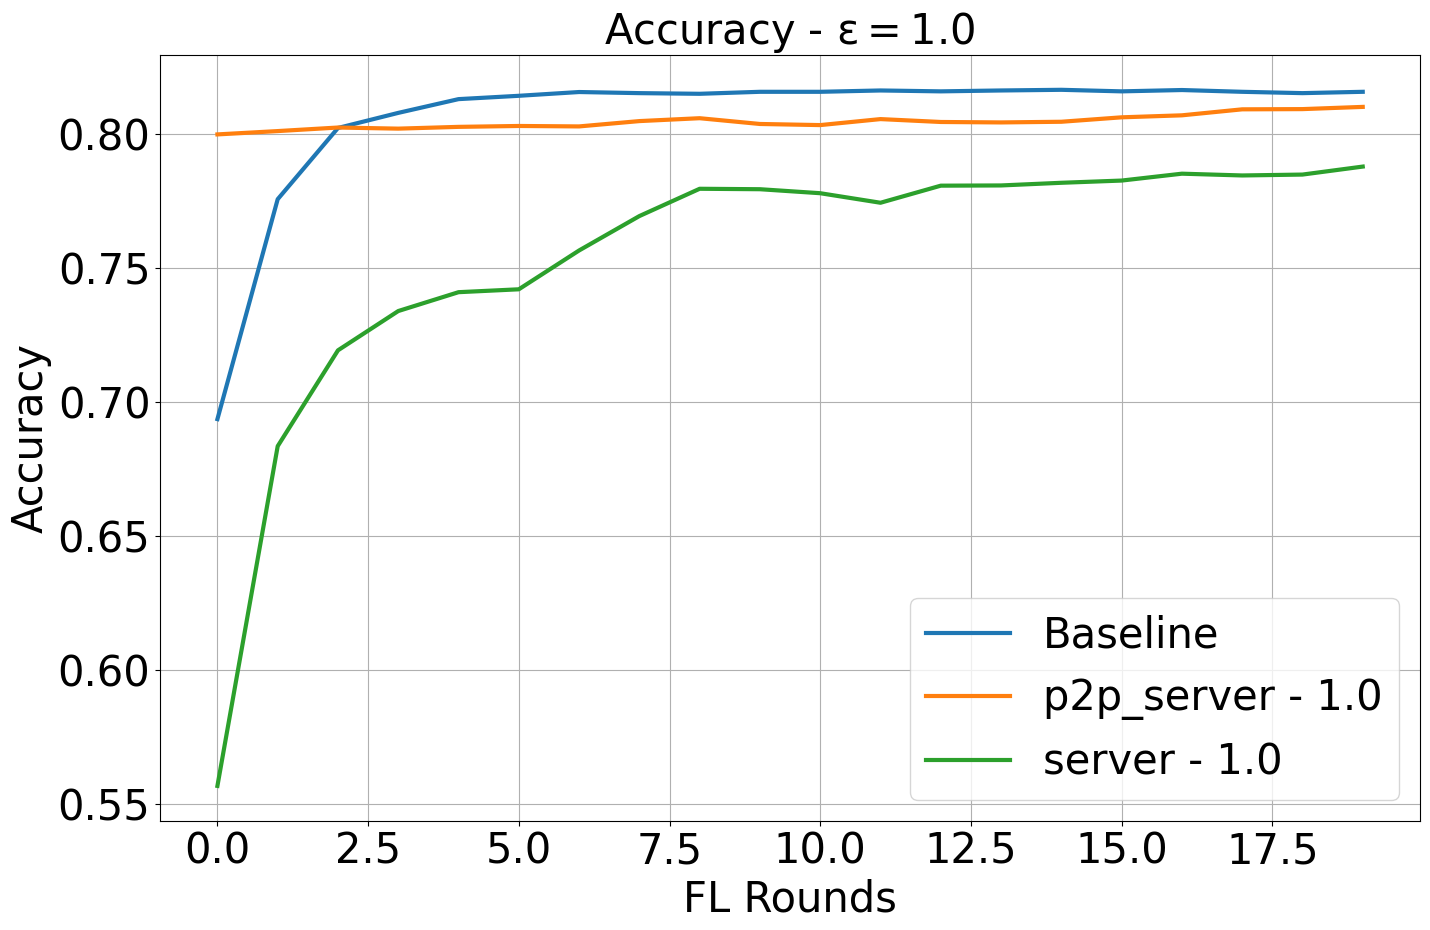

In [25]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.4", dataset_name="dutch")

# Income

In [26]:
baselines = {
    "0.2": get_data("/lucacorbucci/income_p2p/runs/2d1ul8lq"),
    "0.3": get_data("/lucacorbucci/income_p2p/runs/ng3lnkfi"),
    "0.4": get_data("/lucacorbucci/income_p2p/runs/w2dcirv8"),
    # "0.5": get_data("/lucacorbucci/income_p2p/runs/mdujn6r6"),
}
baselines_accuracy = {
    experiment_name: remove_nan(value, "Test Accuracy on the server")
    for experiment_name, value in baselines.items()
}

# 20% Public

In [27]:
wandb_data = {
    "p2p_server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/9vwhjnlm"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/c6uj4t3c"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/wwbxt651"),
    },
    "server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/36apol2z"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/4hctjxy2"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/izlmlci9"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

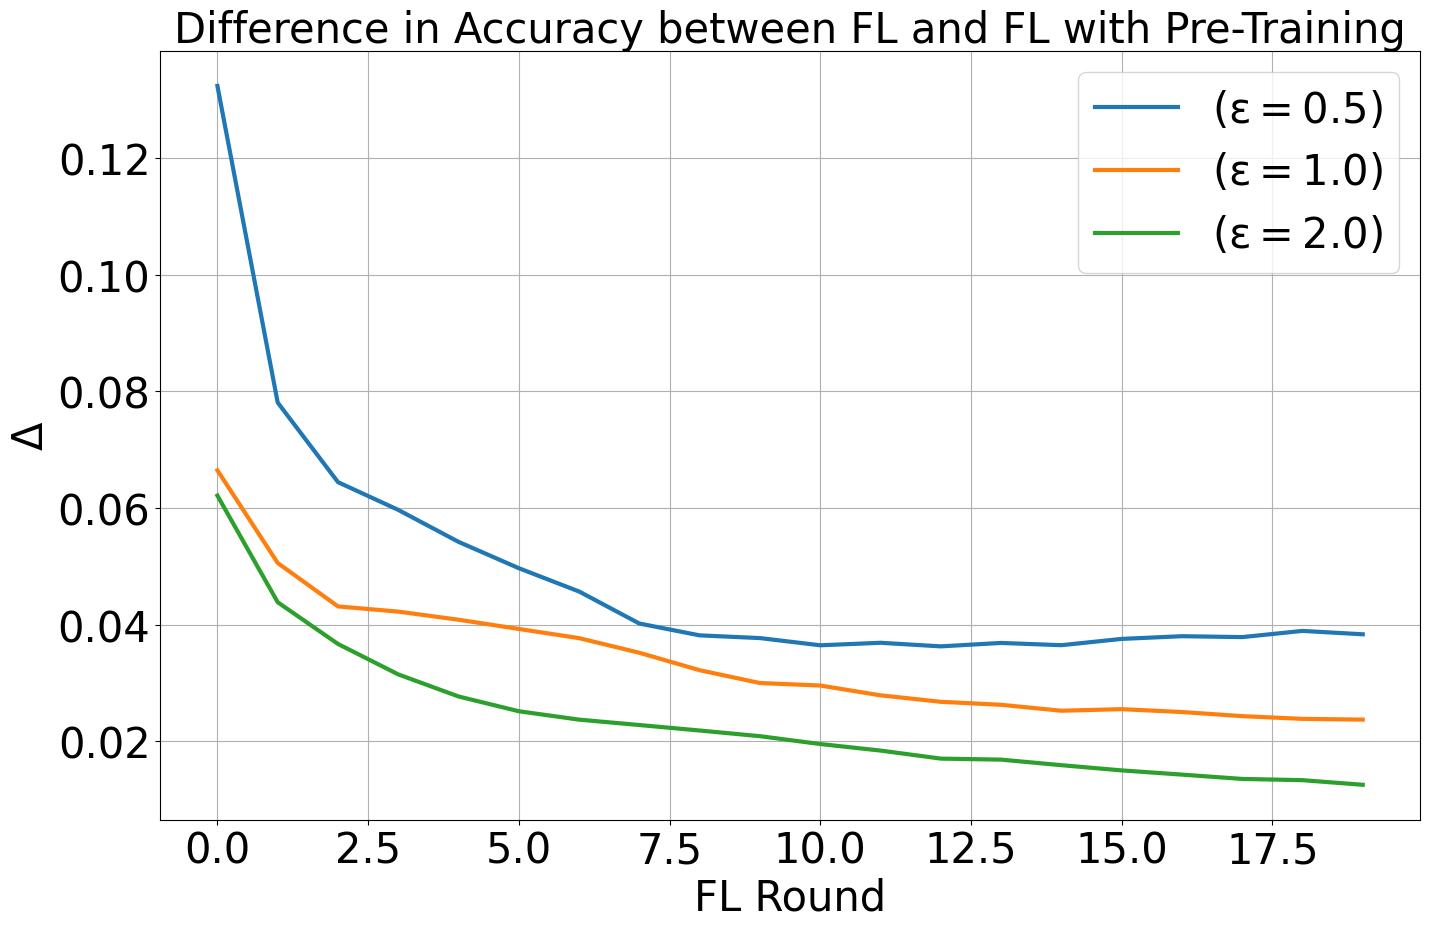

In [28]:
plot_differences(differences, dataset_name="income", size=0.2)

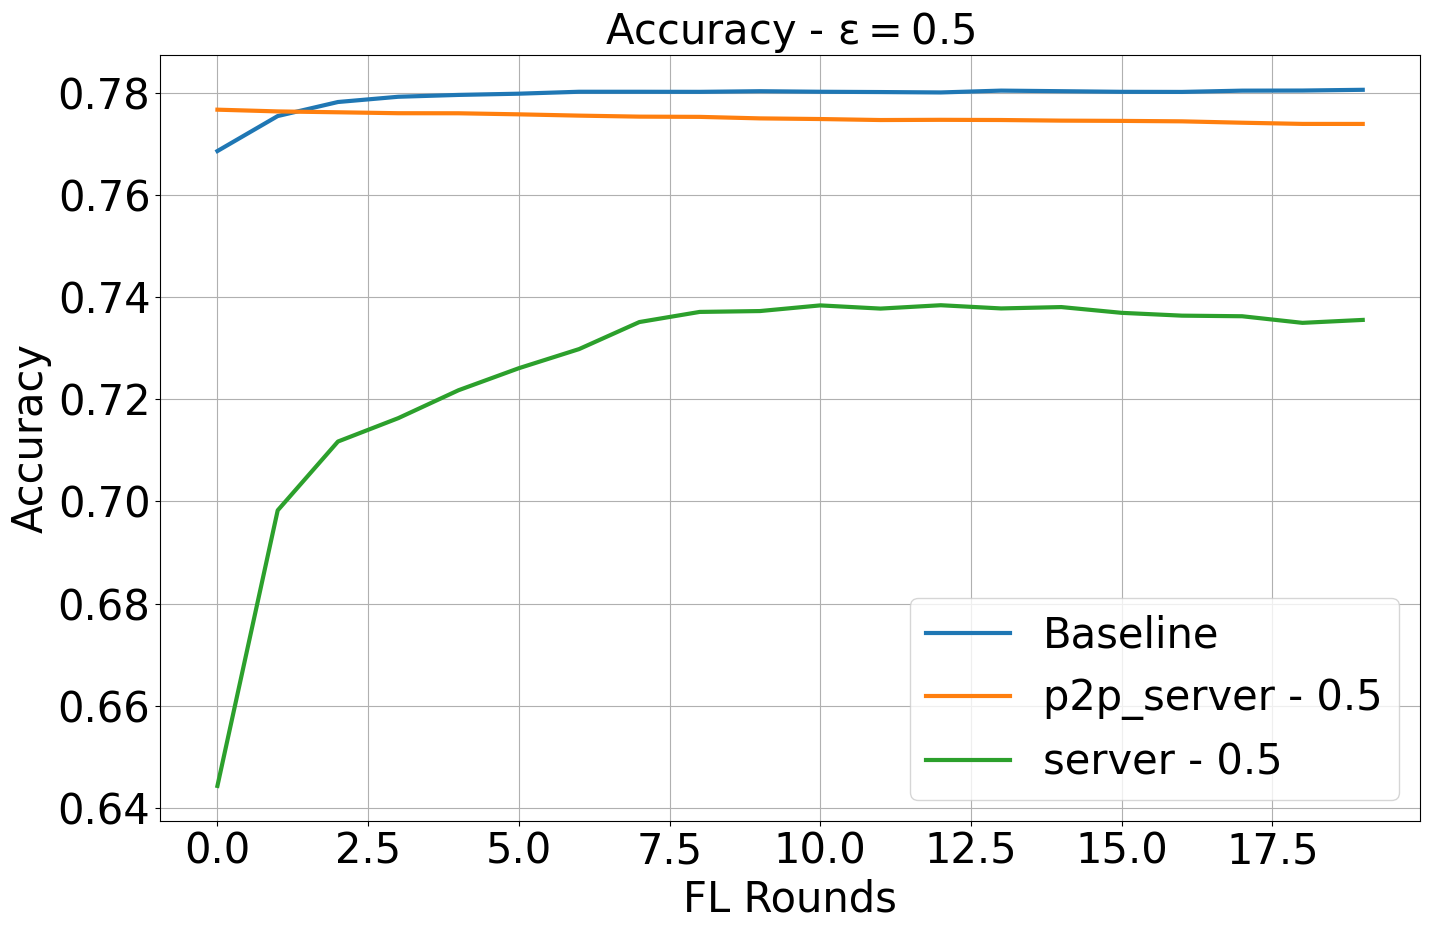

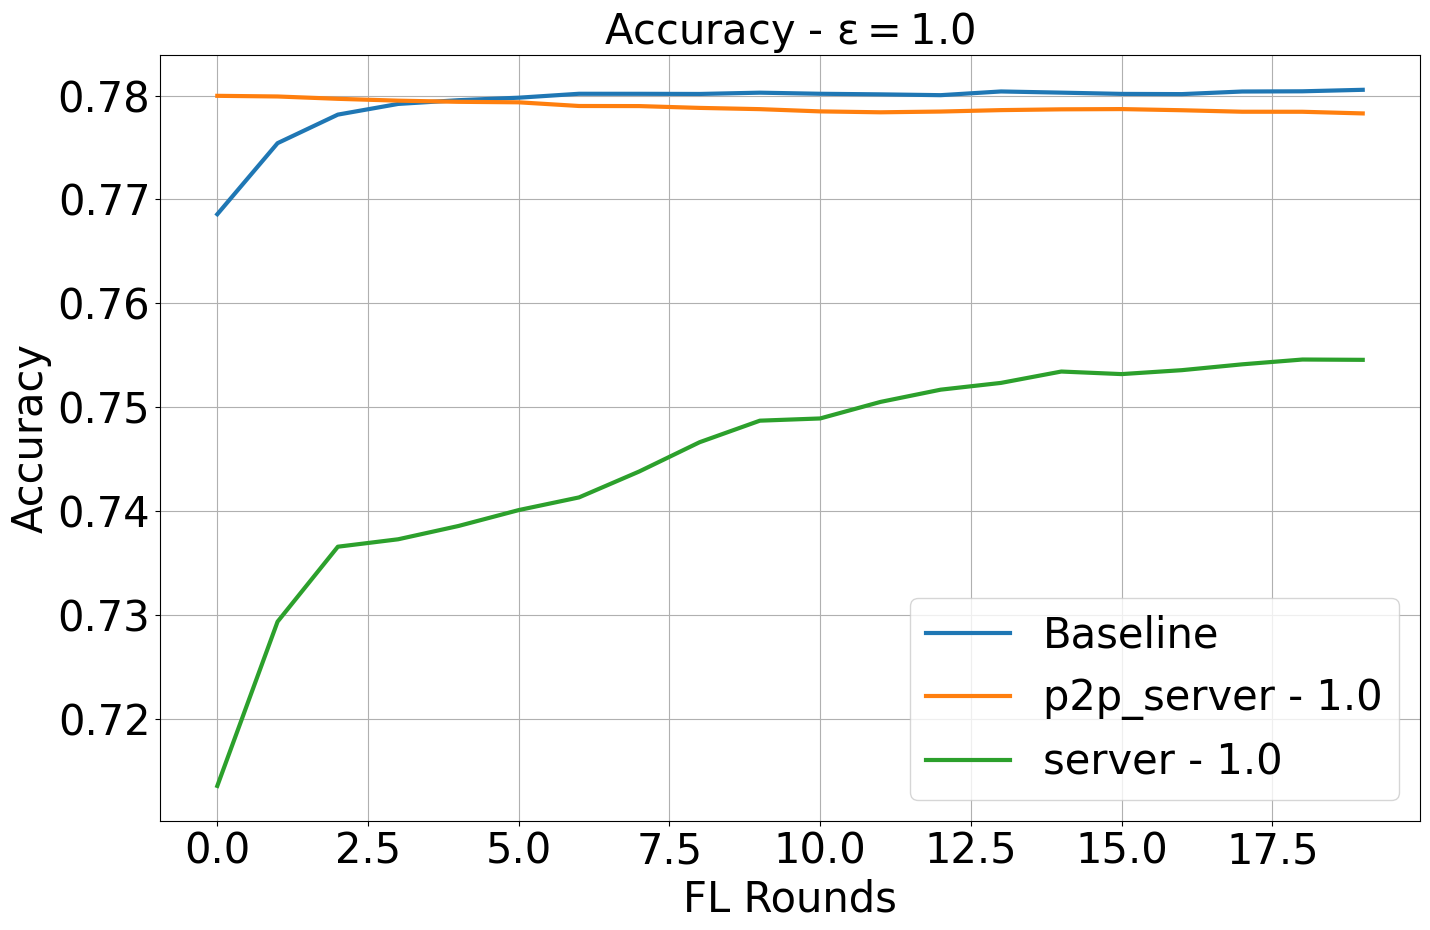

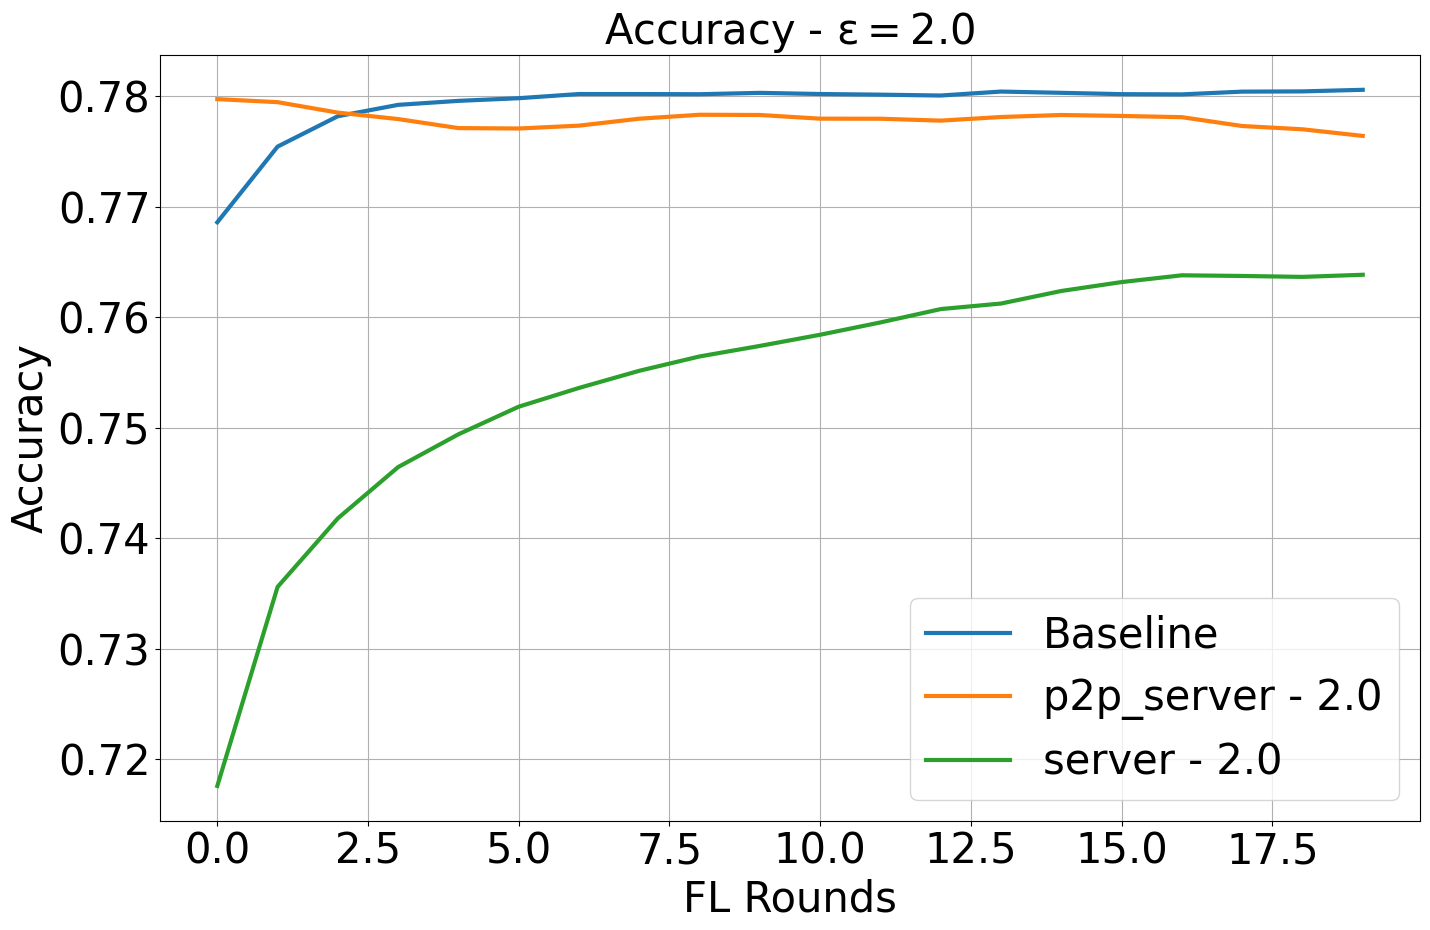

In [29]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.2", dataset_name="income")

# 30% Public

In [30]:
wandb_data = {
    "p2p_server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/xw9s6opd"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/nzps4qpr"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/4jny4tdw"),
    },
    "server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/geo86e6a"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/6gjxy6ny"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/1n6ae2ox"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}
differences = compute_difference(test_accuracy, "p2p_server", "server")

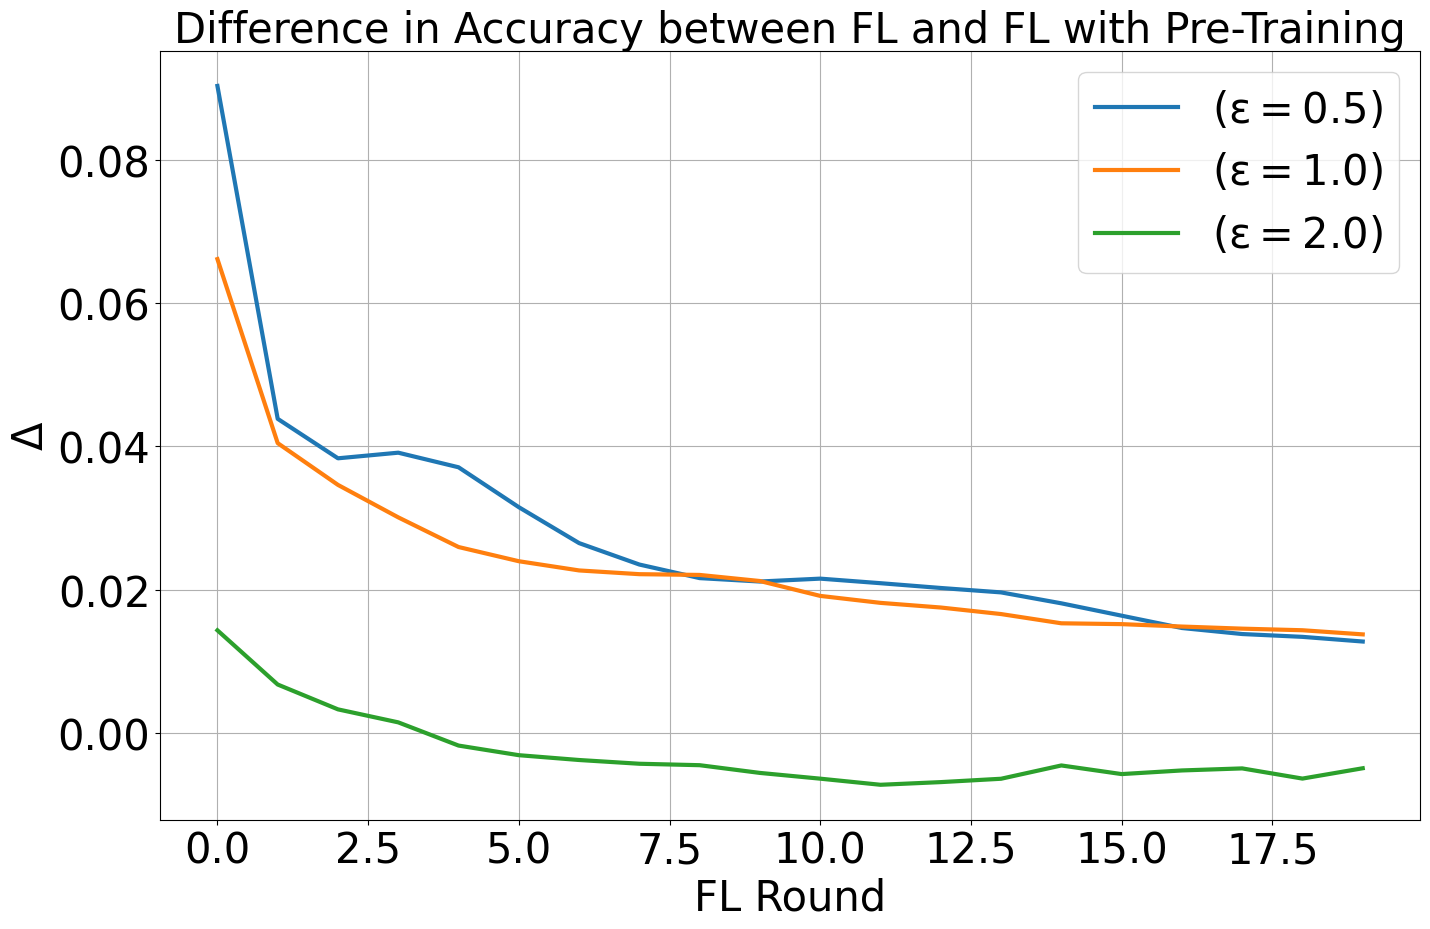

In [31]:
plot_differences(differences, dataset_name="income", size=0.3)

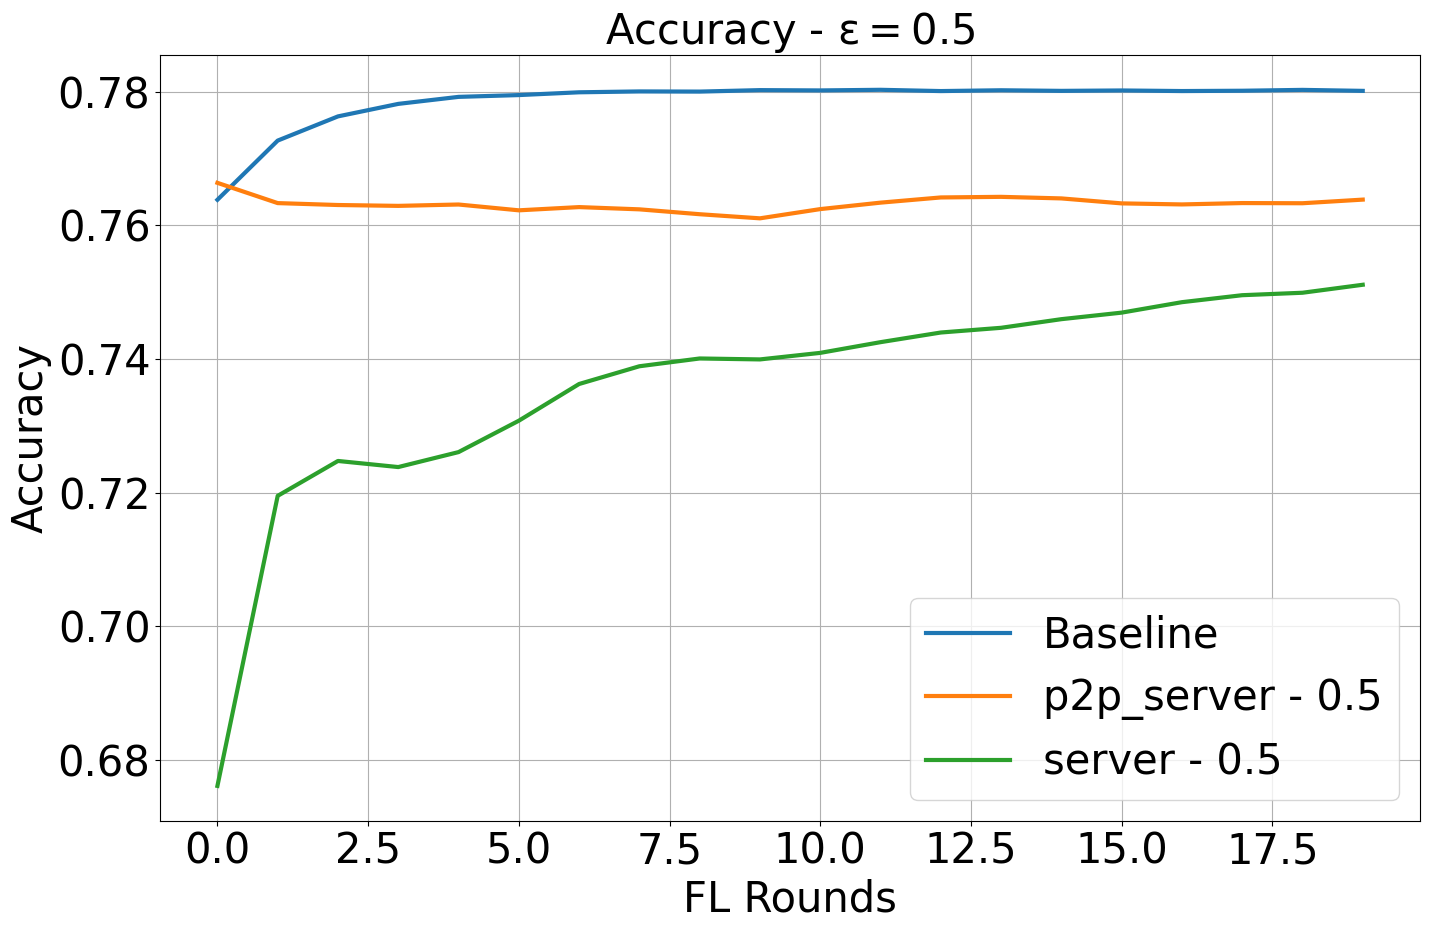

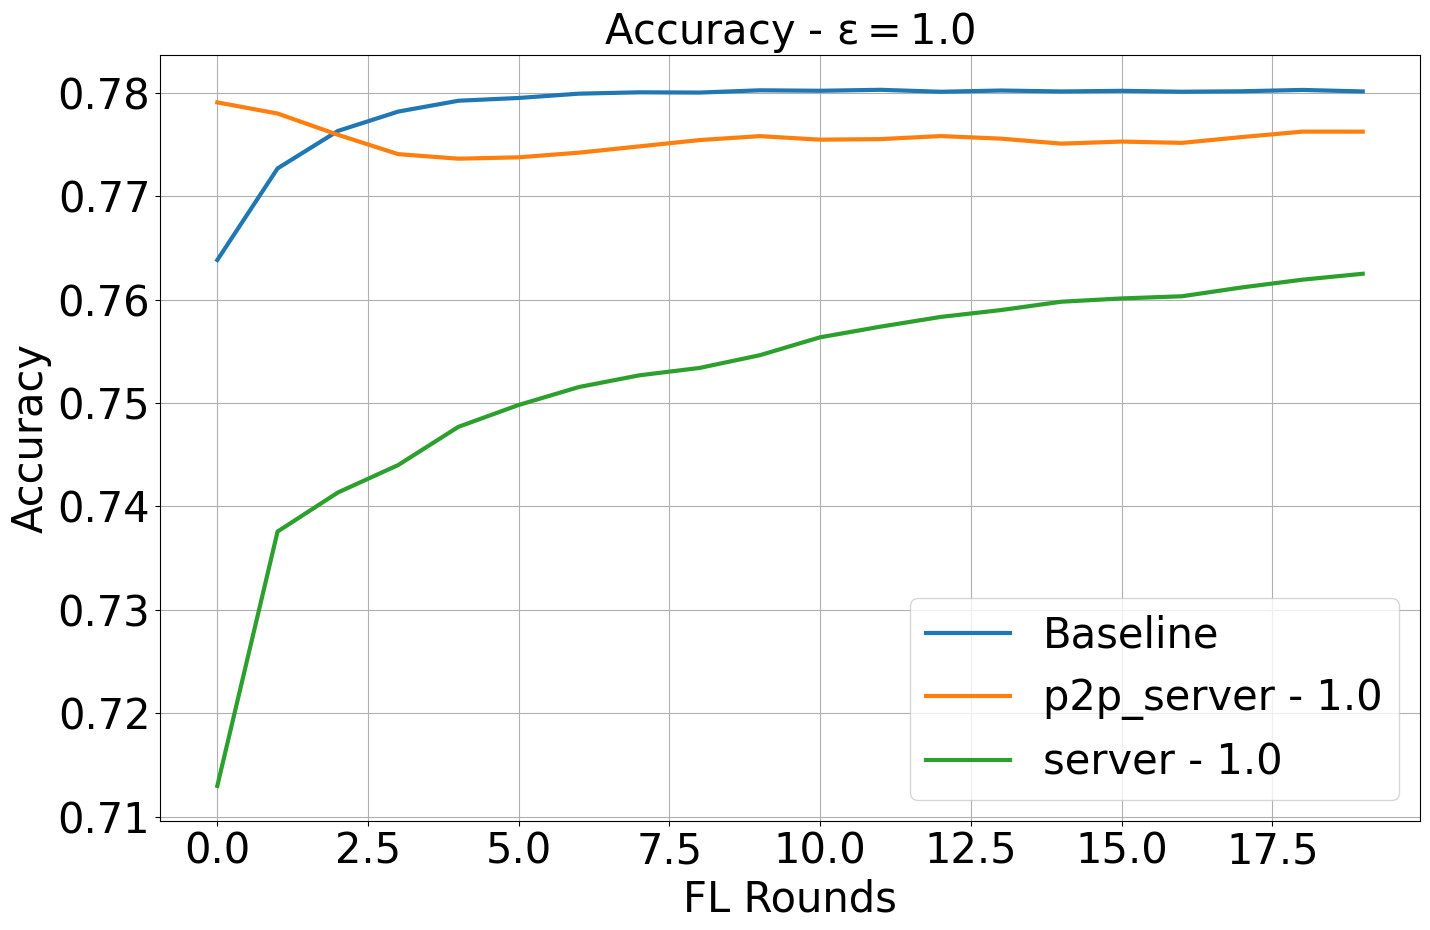

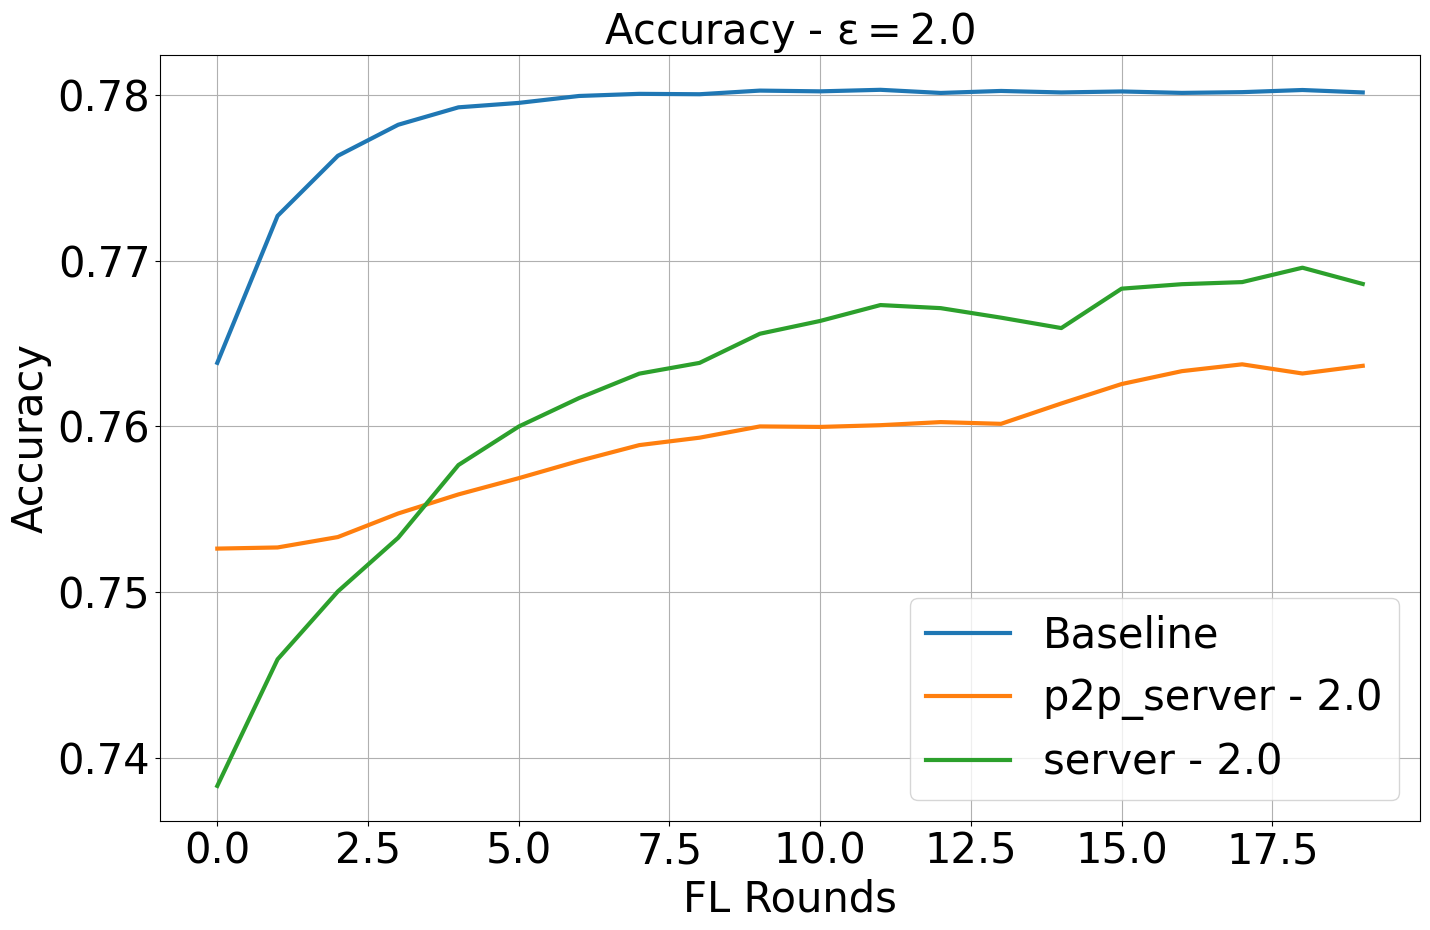

In [32]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.3", dataset_name="income")

# 40% Public

In [33]:
wandb_data = {
    "p2p_server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/d5w4abt1"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/nzdrjvyp"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/zk75rkgb"),
    },
    "server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/1rciacde"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/8jyyhh6g"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/iatmkxlx"),
    },
}


test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

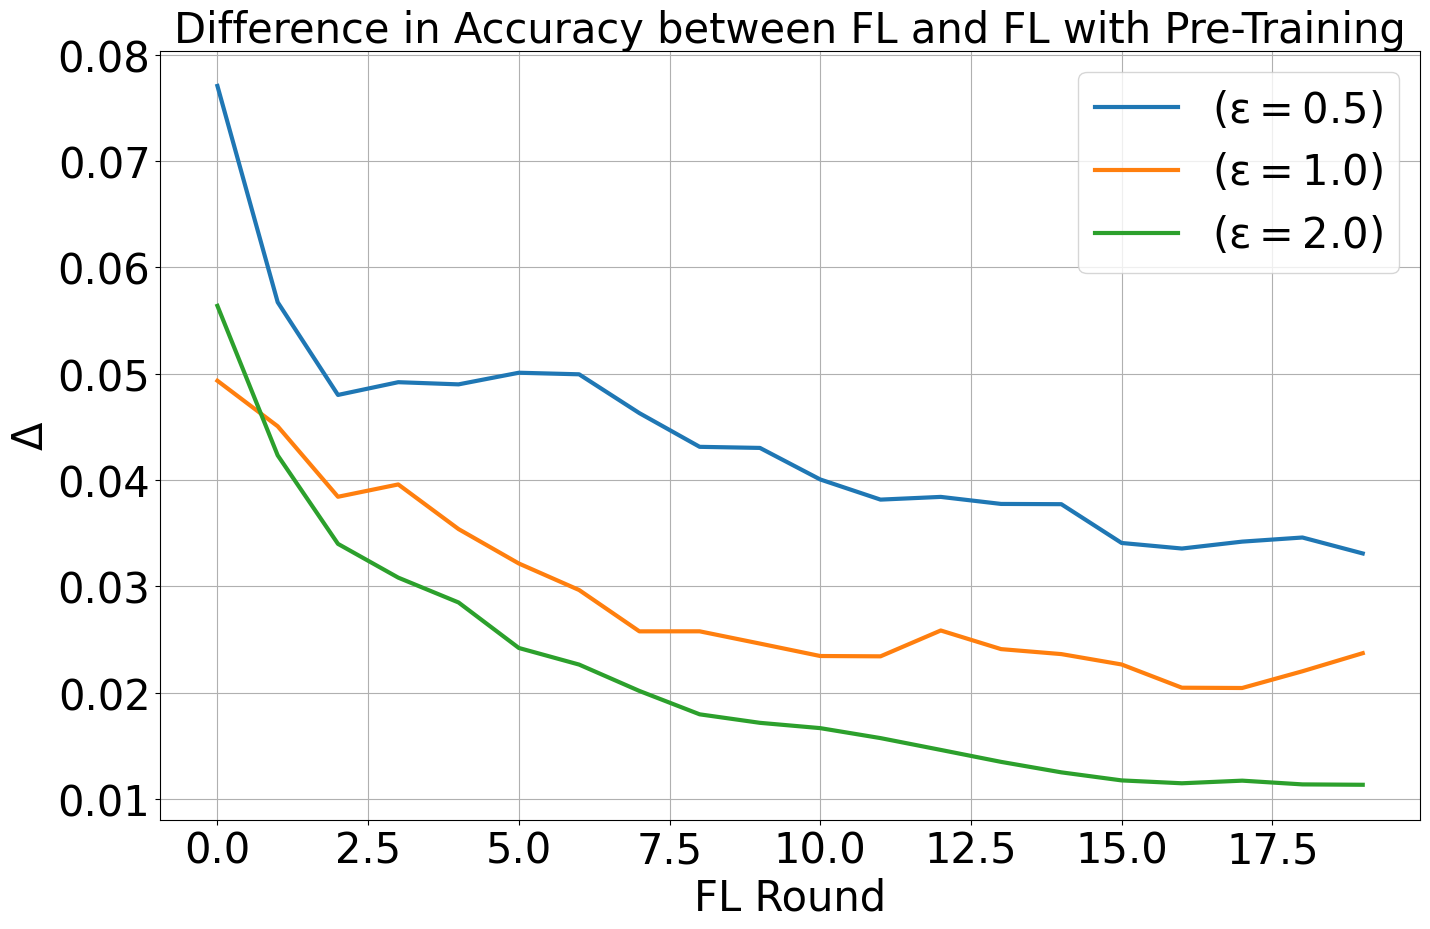

In [34]:
plot_differences(differences, dataset_name="income", size=0.4)

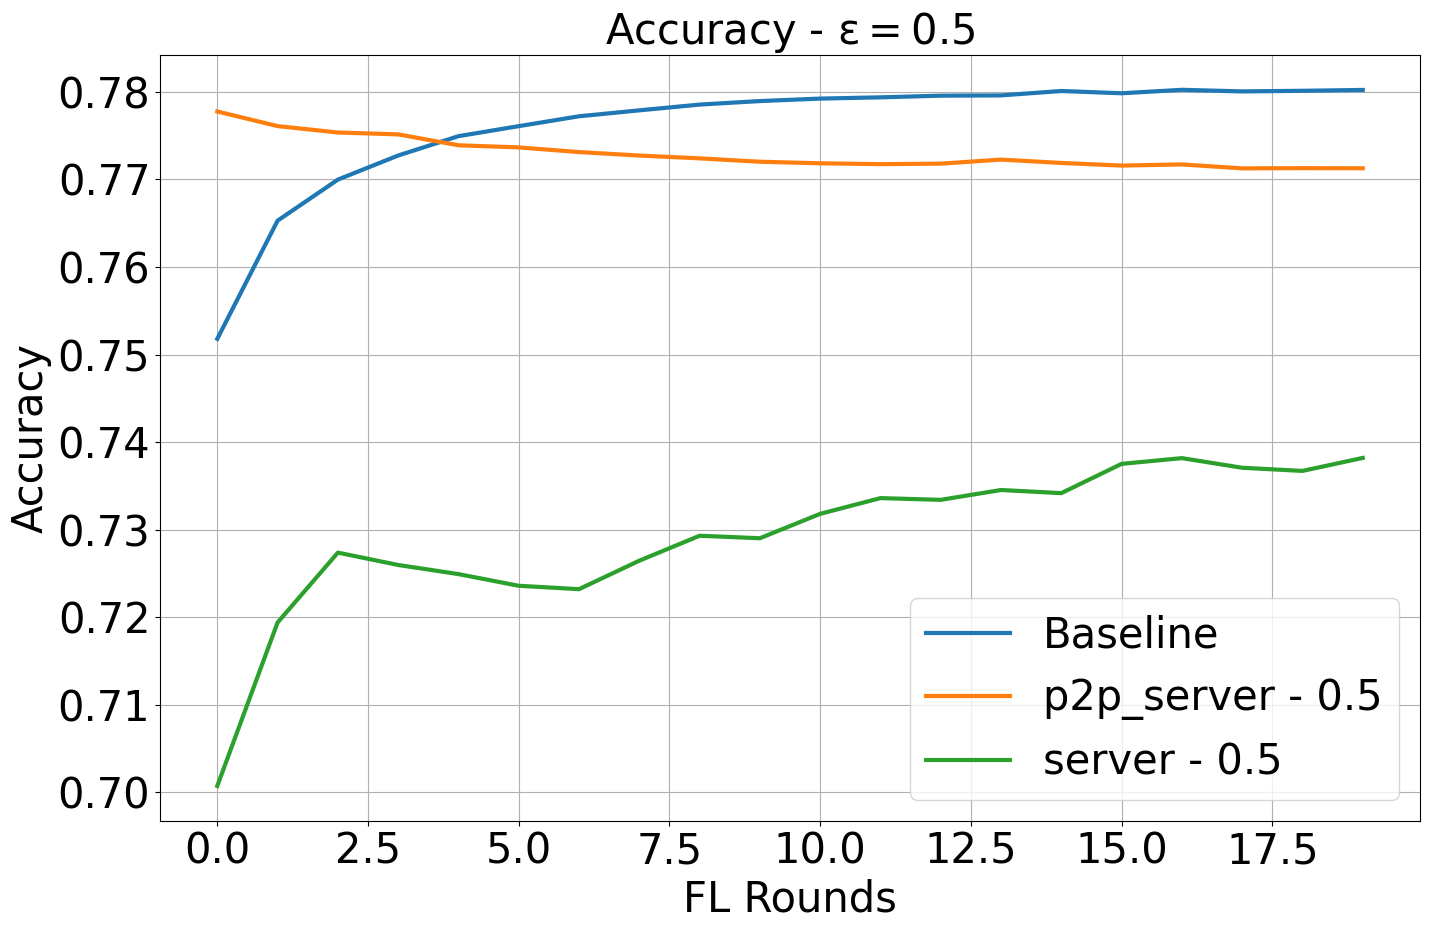

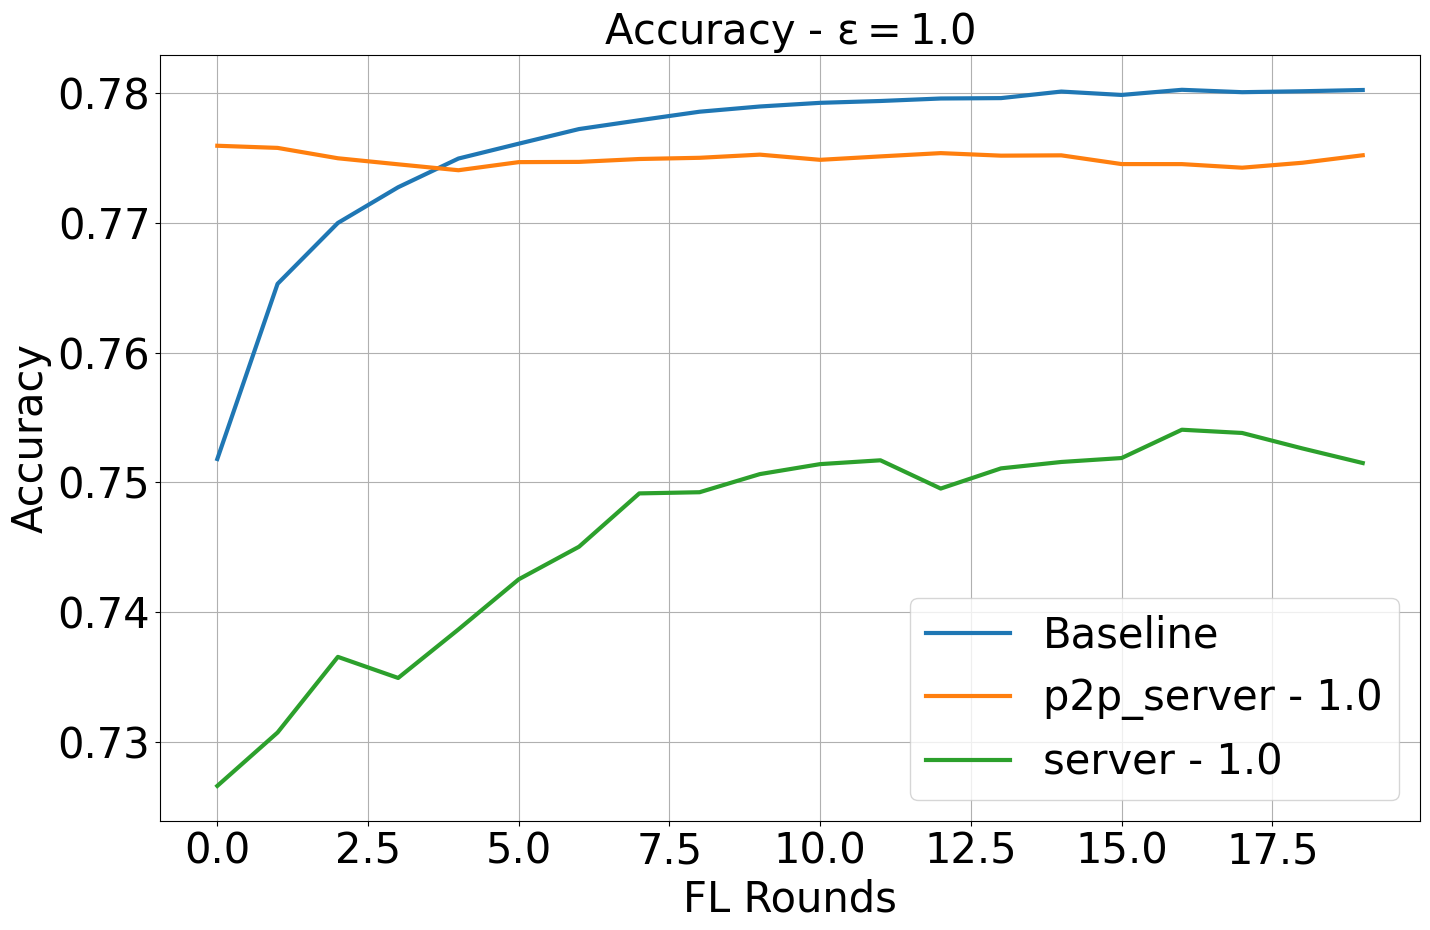

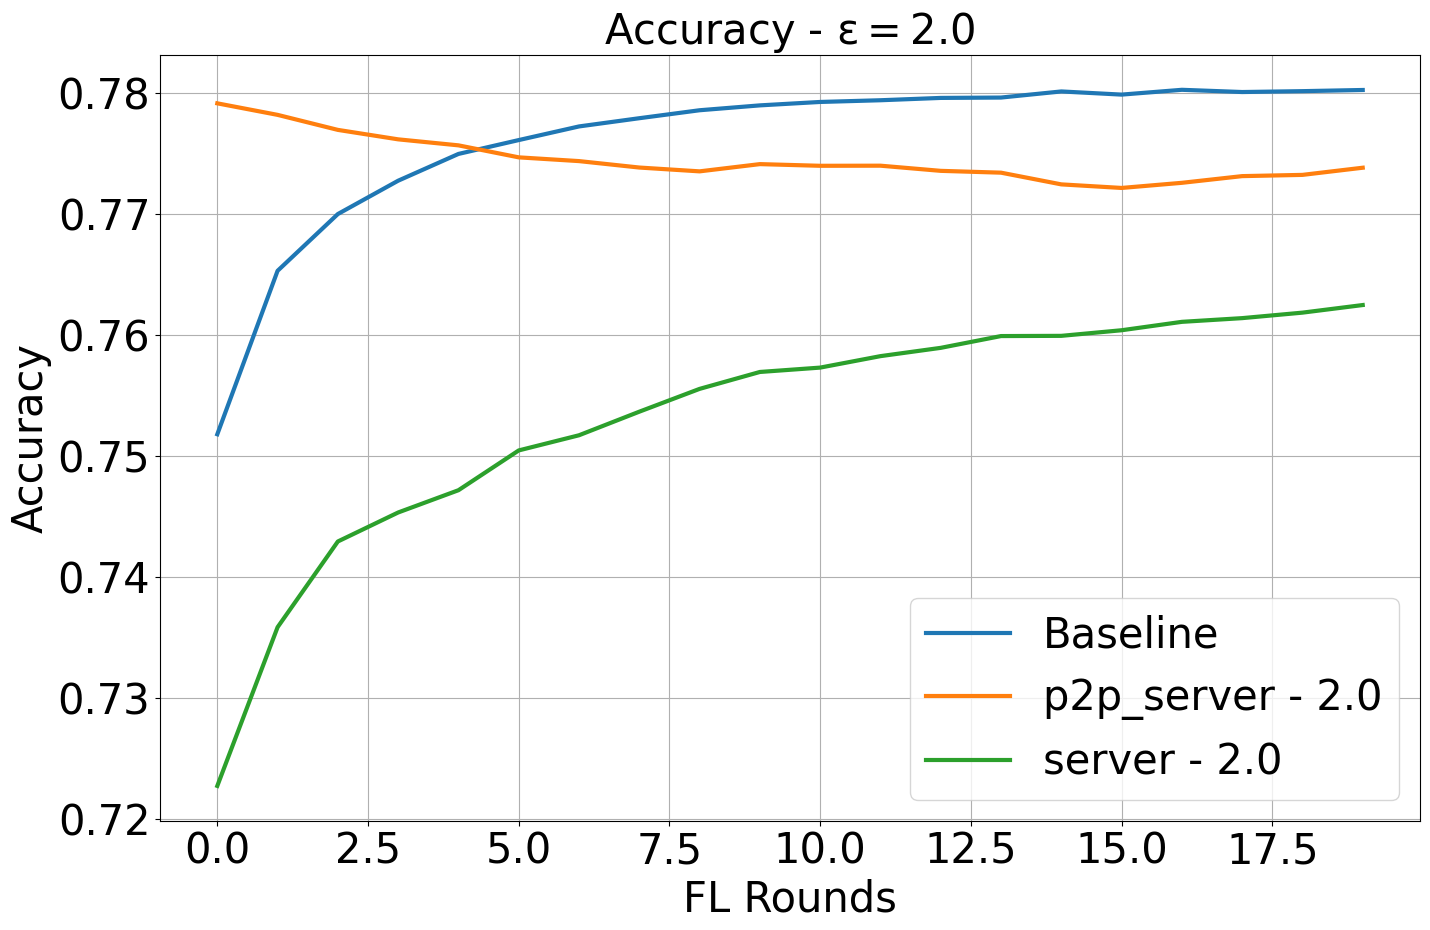

In [35]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.4", dataset_name="income")

# Celeba

In [36]:
baselines = {
    "0.2": get_data("/lucacorbucci/income_p2p/runs/9w93e4eu"),
    "0.3": get_data("/lucacorbucci/income_p2p/runs/wnxuer24"),
    # "0.4": get_data("/lucacorbucci/income_p2p/runs/"),
}
baselines_accuracy = {
    experiment_name: remove_nan(value, "Test Accuracy on the server")
    for experiment_name, value in baselines.items()
}

CommError: Could not find run <Run lucacorbucci/income_p2p/9w93e4eu (not found)>

# 20% Public

In [ ]:
wandb_data = {
    "p2p_server": {
        "5.0": get_data("/lucacorbucci/income_p2p/runs/wl6nj3ya"),
    },
    "server": {
        "5.0": get_data("/lucacorbucci/income_p2p/runs/ejfcwshy"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

In [ ]:
plot_differences(differences, dataset_name="celeba", size=0.2)

In [ ]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.2", dataset_name="celeba")

# 30% Public

In [ ]:
wandb_data = {
    "p2p_server": {
        "5.0": get_data("/lucacorbucci/income_p2p/runs/0hlarv9y"),
    },
    "server": {
        "5.0": get_data("/lucacorbucci/income_p2p/runs/nw50pull"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}
differences = compute_difference(test_accuracy, "p2p_server", "server")

In [ ]:
plot_differences(differences, dataset_name="celeba", size=0.3)

In [ ]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.3", dataset_name="celeba")

# 40% Public

In [ ]:
wandb_data = {
    "p2p_server": {
        "5.0": get_data("/lucacorbucci/income_p2p/runs/"),
    },
    "server": {
        "5.0": get_data("/lucacorbucci/income_p2p/runs/"),
    },
}


test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

In [ ]:
plot_differences(differences, dataset_name="celeba", size=0.4)

In [ ]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.4", dataset_name="celeba")